**Mounting the drive and Dataset Reading**

In [20]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Accessing the Flight_delay_prediction_dataset from the google drive
import os
os.chdir("/content/drive/MyDrive/Flight_delay_prediction_dataset")

In [3]:
# Listing all the files in the Flight_delay_prediction_dataset folder
!ls

airlines.csv	 airports.gsheet      flighticon_green.png   flight_rf.pkl  result.csv
airlines.gsheet  airports_map1.html   flighticon_orange.png  flights.csv
airports.csv	 flighticon_blue.png  flighticon.png	     model.pkl


**Install required modules**

In [4]:
pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 8.8 MB/s eta 0:00:00


**Import required modules**

In [5]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from folium import plugins
import matplotlib.pyplot as plt
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from branca.colormap import LinearColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

**Reading and analyzing the datasets**

In [6]:
# Reading the contents of all the files
airlines_csv = pd.read_csv("/content/drive/MyDrive/Flight_delay_prediction_dataset/airlines.csv")
airlines_csv

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

In [7]:
airlines_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [8]:
airlines_csv.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [9]:
airlines_csv.describe()

IATA_CODE                AIRLINE
count         14                     14
unique        14                     14
top           UA  United Air Lines Inc.
freq           1                      1

In [10]:
airports_csv = pd.read_csv("/content/drive/MyDrive/Flight_delay_prediction_dataset/airports.csv")
airports_csv

IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906  -98.42183  
4                            Albany    GA     USA  31.53552  -84.19447  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA  56.48433 -132.36982  
318                West Yellowstone    MT     USA  44.68840 -111.11764  
319  Fayetteville/Springdale/Rogers    AR     USA  36.28187  -94.30681  
320                         Yakutat    AK     USA  59.50336 -139.66023  
321                            Yuma    AZ     USA  32.65658 -114.60597  

[322 rows x 7 columns]

In [11]:
airports_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [12]:
airports_csv.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [13]:
airports_csv.describe()

LATITUDE   LONGITUDE
count  319.000000  319.000000
mean    38.981244  -98.378964
std      8.616736   21.523492
min     13.483450 -176.646030
25%     33.652040 -110.839385
50%     39.297610  -93.403070
75%     43.154675  -82.722995
max     71.285450  -64.798560

In [14]:
flights_csv = pd.read_csv("/content/drive/MyDrive/Flight_delay_prediction_dataset/flights.csv")
flights_csv

<ipython-input-14-ab391523bbd0>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_csv = pd.read_csv("/content/drive/MyDrive/Flight_delay_prediction_dataset/flights.csv")


YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                  ANC                 SEA                    5  ...   
1                  LAX                 PBI                   10  ...   
2                  SFO                 CLT                   20  ...   
3                  LAX                 MIA                   20  ...   
4                  SEA                 ANC                   25  ...   
...                ...                 ...                  ...  ...   
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0               408.0          -22.0         0          0   
1               741.0           -9.0         0          0   
2               811.0            5.0         0          0   
3               756.0           -9.0         0          0   
4               259.0          -21.0         0          0   
...               ...            ...       ...        ...   
5819074         753.0          -26.0         0          0   
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                        NaN               NaN             NaN            NaN   
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5819074                  NaN               NaN             NaN            NaN   
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                        NaN            NaN  
1                        NaN            NaN  
2                        NaN            NaN  
3                        NaN            NaN  
4                        NaN            NaN  
...                      ...            ...  
5819074                  NaN            NaN  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078

In [15]:
flights_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [16]:
flights_csv.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [17]:
flights_csv.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00   
min           1.000000e+00    1.000000e+00    -8.200000e+01  1.000000e+00   
25%           9.170000e+02    9.210000e+02    -5.000000e+00  1.100000e+01   
50%           1.325000e+03    1.330000e+03    -2.000000e+00  1.400000e+01   
75%           1.730000e+03    1.740000e+03     7.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  ...  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  5.730032e+06  ...       5.819079e+06  5.726566e+06   5.714008e+06   
mean   1.357171e+03  ...       1.493808e+03  1.476491e+03   4.407057e+00   
std    4.980094e+02  ...       5.071647e+02  5.263197e+02   3.927130e+01   
min    1.000000e+00  ...       1.000000e+00  1.000000e+00  -8.700000e+01   
25%    9.350000e+02  ...       1.110000e+03  1.059000e+03  -1.300000e+01   
50%    1.343000e+03  ...       1.520000e+03  1.512000e+03  -5.000000e+00   
75%    1.754000e+03  ...       1.918000e+03  1.917000e+03   8.000000e+00   
max    2.400000e+03  ...       2.400000e+03  2.400000e+03   1.971000e+03   

           DIVERTED     CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count  5.819079e+06  5.819079e+06      1.063439e+06    1.063439e+06   
mean   2.609863e-03  1.544643e-02      1.348057e+01    7.615387e-02   
std    5.102012e-02  1.233201e-01      2.800368e+01    2.143460e+00   
min    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
50%    0.000000e+00  0.000000e+00      2.000000e+00    0.000000e+00   
75%    0.000000e+00  0.000000e+00      1.800000e+01    0.000000e+00   
max    1.000000e+00  1.000000e+00      1.134000e+03    5.730000e+02   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   1.063439e+06         1.063439e+06   1.063439e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  
std     4.816164e+01         4.319702e+01   2.043334e+01  
min     0.000000e+00         0.000000e+00   0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  

[8 rows x 26 columns]

**Data Preprocessing**

In [18]:
# Dropping the rows whose latitude and longitude are null from the airports_csv file
airports_csv = airports_csv.dropna(subset = ['LATITUDE', 'LONGITUDE'])

In [19]:
# Dropping the required rows where some of the required column values are null from the flights_csv file
flights_csv = flights_csv.dropna(subset = ['TAIL_NUMBER','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME', 'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [20]:
# Dropping the columns from the dataset where they add upto the small amount of the dataset from the flights_csv file
flights_csv = flights_csv.drop(['DAY_OF_WEEK', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'FLIGHT_NUMBER', 'WHEELS_OFF', 'WHEELS_ON', 'AIR_TIME', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'DISTANCE'], axis = 1)

In [21]:
# Dropping the rows where ARRIVAL_DELAY and DEPARTURE_DELAY column values are null from the flights_csv file
flights_csv = flights_csv.dropna(subset = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

In [22]:
# Printing the information of the flights_csv file after pre-processing the data
flights_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   AIRLINE              object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   DEPARTURE_DELAY      float64
 7   ARRIVAL_DELAY        float64
dtypes: float64(2), int64(3), object(3)
memory usage: 392.3+ MB


In [23]:
# Checking if there are any null values in any of the columns of the flights_csv file
flights_csv.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
ARRIVAL_DELAY          0
dtype: int64

In [24]:
# Now merging the flights_csv with the airlines_csv file and storing the data in the total_flight_info dataframe
total_flight_info = flights_csv.merge(airlines_csv, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [25]:
# Printing all the columns of the total_flight_info dataframe
total_flight_info.columns

Index(['YEAR', 'MONTH', 'DAY', 'AIRLINE_x', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'IATA_CODE',
       'AIRLINE_y'],
      dtype='object')

In [26]:
# Dropping the columns from the total_flight_info dataframe which are not required
total_flight_info = total_flight_info.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [27]:
# Renaming the columns of the total_flight_info dataframe with the meaningful names for the better understanding of the code
total_flight_info = total_flight_info.rename(columns={"AIRLINE_y":"AIRLINE"})

In [28]:
# Now, merging the airports_csv file with the total_flight_info
total_flight_info = total_flight_info.merge(airports_csv, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
total_flight_info = total_flight_info.merge(airports_csv, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [29]:
# Printing all the columns of the total_flight_info dataframe after merging
total_flight_info.columns

Index(['YEAR', 'MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIRLINE', 'IATA_CODE_x',
       'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y',
       'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [30]:
# Dropping the columns from the total_flight_info dataframe which are not required after merging
total_flight_info = total_flight_info.drop(['LATITUDE_x', 'LONGITUDE_x', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x', 'AIRPORT_x', 'AIRPORT_y', 'CITY_x', 'CITY_y', 'IATA_CODE_x', 'IATA_CODE_y'], axis=1)

In [31]:
# Creating the two new columns IS_ARRIVAL_DELAYED and IS_DEPARTURE_DELAYED by checking if there are any delays for the ARRIVAL_DELAY and the DEPARTURE_DELAY in the total_flight_info dataset
total_flight_info['IS_ARRIVAL_DELAYED'] = np.where(total_flight_info['ARRIVAL_DELAY']<=0, 0, 1)
total_flight_info['IS_DEPARTURE_DELAYED'] = np.where(total_flight_info['DEPARTURE_DELAY']<=0, 0, 1)

In [32]:
total_flight_info['IS_DELAYED'] = np.where((total_flight_info['IS_ARRIVAL_DELAYED'] == 0) & (total_flight_info['IS_DEPARTURE_DELAYED'] == 0), 0, 1)

In [33]:
# Printing the data of the total_flight_info dataframe
total_flight_info

YEAR  MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  DEPARTURE_DELAY  \
0        2015      1    1            ANC                 SEA            -11.0   
1        2015      1    1            ANC                 SEA             -4.0   
2        2015      1    1            ANC                 SEA            -15.0   
3        2015      1    1            ANC                 SEA            -11.0   
4        2015      1    1            ANC                 SEA             -8.0   
...       ...    ...  ...            ...                 ...              ...   
5221995  2015     12   29            MEI                 PIB             -9.0   
5221996  2015     12   30            MEI                 PIB            101.0   
5221997  2015     12   30            MEI                 PIB             10.0   
5221998  2015     12   31            MEI                 PIB            -14.0   
5221999  2015     12   31            MEI                 PIB            -26.0   

         ARRIVAL_DELAY                      AIRLINE  IS_ARRIVAL_DELAYED  \
0                -22.0         Alaska Airlines Inc.                   0   
1                -14.0         Alaska Airlines Inc.                   0   
2                -35.0         Alaska Airlines Inc.                   0   
3                -12.0         Alaska Airlines Inc.                   0   
4                -14.0         Alaska Airlines Inc.                   0   
...                ...                          ...                 ...   
5221995          -18.0  Atlantic Southeast Airlines                   0   
5221996           90.0  Atlantic Southeast Airlines                   1   
5221997           10.0  Atlantic Southeast Airlines                   1   
5221998          -18.0  Atlantic Southeast Airlines                   0   
5221999          -32.0  Atlantic Southeast Airlines                   0   

         IS_DEPARTURE_DELAYED  IS_DELAYED  
0                           0           0  
1                           0           0  
2                           0           0  
3                           0           0  
4                           0           0  
...                       ...         ...  
5221995                     0           0  
5221996                     1           1  
5221997                     1           1  
5221998                     0           0  
5221999                     0           0  

[5222000 rows x 11 columns]

In [34]:
# Printing the names of the columns of the total_flight_info dataframe for the better understanding
total_flight_info.columns

Index(['YEAR', 'MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIRLINE', 'IS_ARRIVAL_DELAYED',
       'IS_DEPARTURE_DELAYED', 'IS_DELAYED'],
      dtype='object')

In [35]:
# Printing the total_flight_info dataframe information to the datatype of each of the column
total_flight_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   YEAR                  int64  
 1   MONTH                 int64  
 2   DAY                   int64  
 3   ORIGIN_AIRPORT        object 
 4   DESTINATION_AIRPORT   object 
 5   DEPARTURE_DELAY       float64
 6   ARRIVAL_DELAY         float64
 7   AIRLINE               object 
 8   IS_ARRIVAL_DELAYED    int64  
 9   IS_DEPARTURE_DELAYED  int64  
 10  IS_DELAYED            int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 478.1+ MB


**Data Visualization**

Representing the arrival delay information in the form of the pie-chart

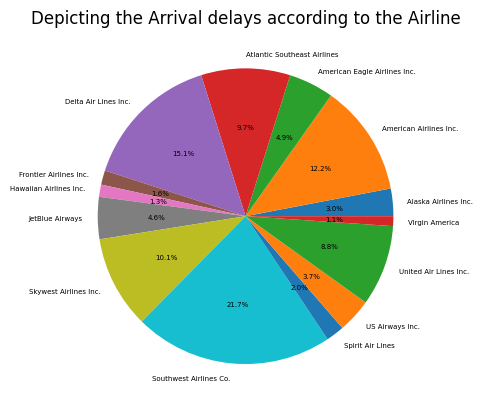

In [36]:
count_arrival_delay = total_flight_info.groupby('AIRLINE')['ARRIVAL_DELAY'].count()
sum_arrival_delay = count_arrival_delay.sum()
arrival_delay = (count_arrival_delay / sum_arrival_delay) * 100

plt.pie(arrival_delay, labels = arrival_delay.index, autopct='%1.1f%%', textprops={'fontsize': 5})
plt.title('Depicting the Arrival delays according to the Airline')
plt.show()

Representing the Departure delay information in the form of the pie-chart

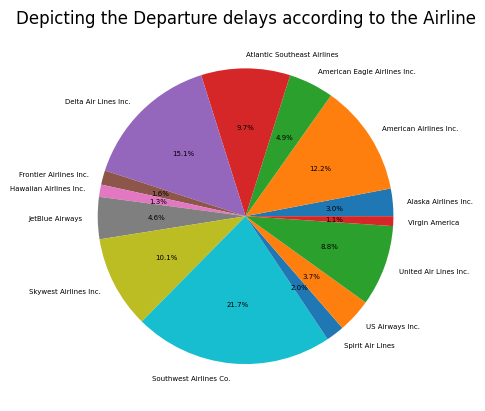

In [37]:
count_arrival_delay = total_flight_info.groupby('AIRLINE')['DEPARTURE_DELAY'].count()
sum_arrival_delay = count_arrival_delay.sum()
arrival_delay = (count_arrival_delay / sum_arrival_delay) * 100

plt.pie(arrival_delay, labels = arrival_delay.index, autopct='%1.1f%%', textprops={'fontsize': 5})
plt.title('Depicting the Departure delays according to the Airline')
plt.show()

Representing both the arrival delays and departure delays in the form of the single pie-chart

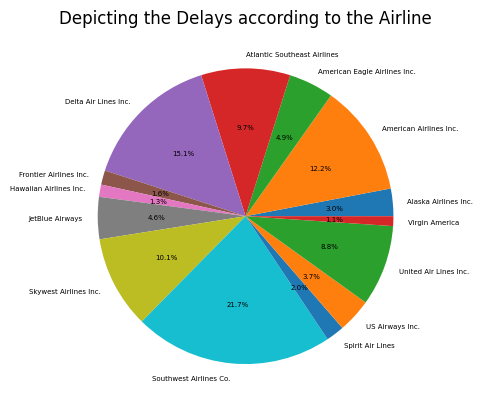

In [38]:
count_arrival_delay = total_flight_info.groupby('AIRLINE')['ARRIVAL_DELAY'].count()
count_departure_delay = total_flight_info.groupby('AIRLINE')['DEPARTURE_DELAY'].count()
sum_arrival_delay = count_arrival_delay.sum()
sum_departure_delay = count_departure_delay.sum()
delay = ((count_arrival_delay + count_departure_delay) / (sum_arrival_delay + sum_departure_delay)) * 100

plt.pie(delay, labels = delay.index, autopct='%1.1f%%', textprops={'fontsize': 5})
plt.title('Depicting the Delays according to the Airline')
plt.show()

Pointing out the airport locations on the map

<ipython-input-39-296bbd2131d3>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-39-296bbd2131d3>:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


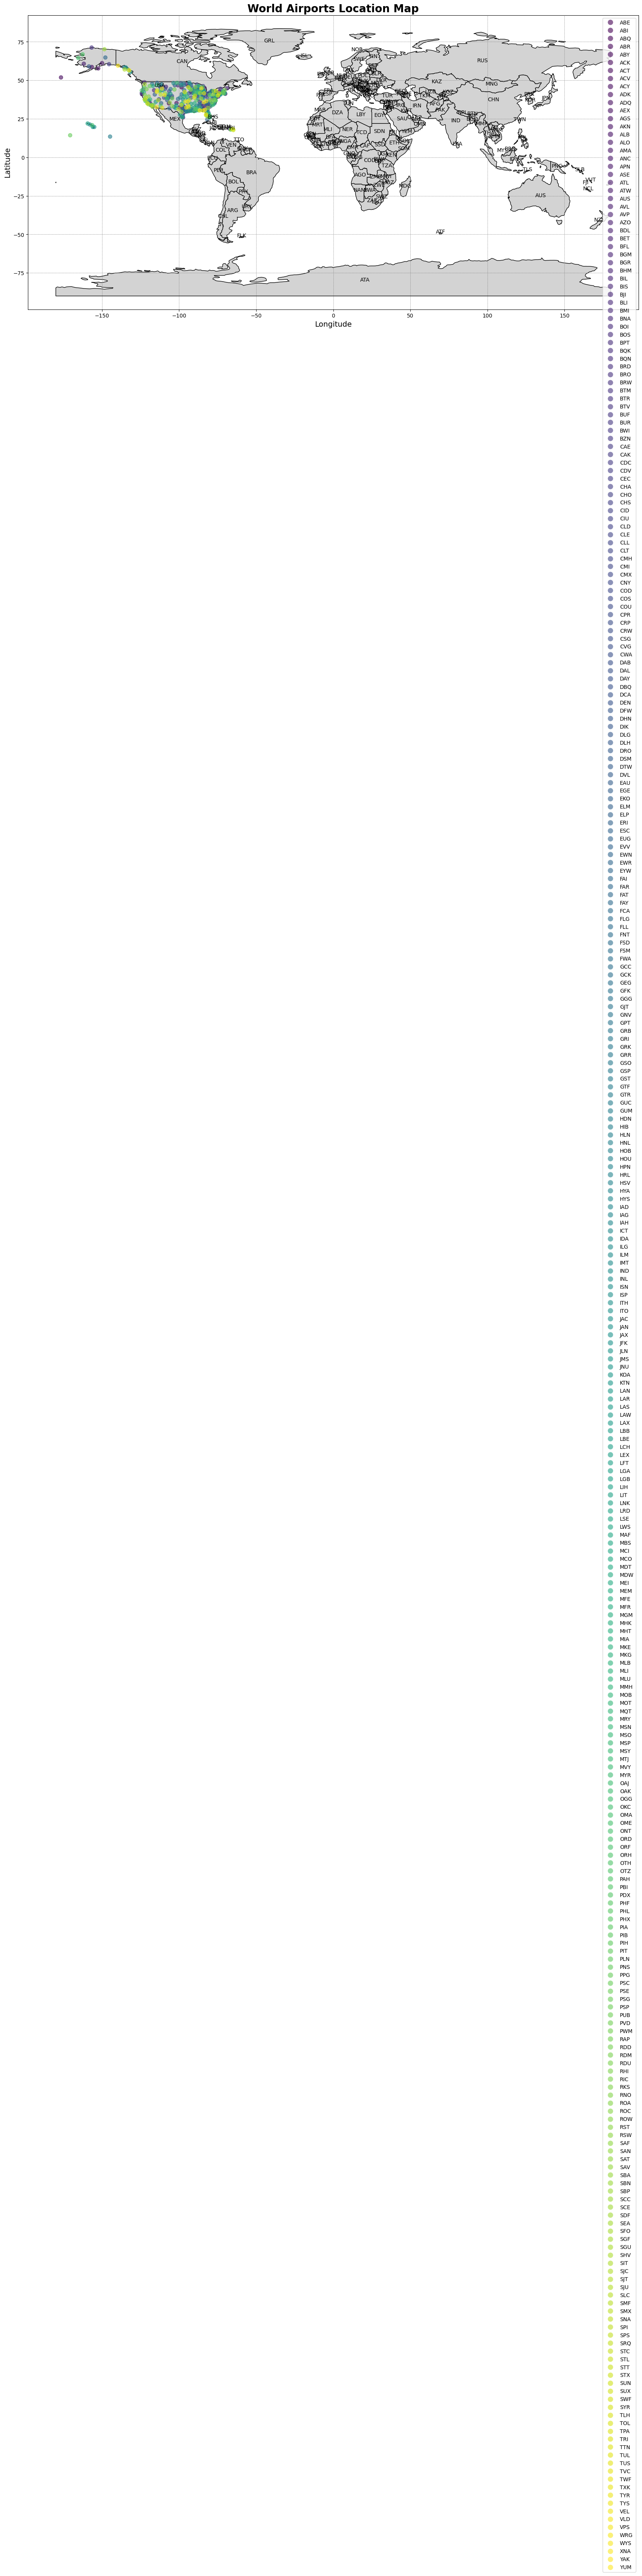

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'airports_csv' is already loaded and contains 'LONGITUDE' and 'LATITUDE' columns
airports_geo_dataframe = gpd.GeoDataFrame(
    airports_csv,
    geometry=gpd.points_from_xy(airports_csv.LONGITUDE, airports_csv.LATITUDE)
)

# Create a world map as the base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(25, 10))  # Adjust the size as needed

# Plot the world map with country boundaries and names
base = world.plot(ax=ax, color='lightgray', edgecolor='black')
world.apply(lambda x: ax.annotate(text=x.iso_a3, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# If you have a numerical column such as 'Passenger_Count' use that for the 'column' parameter
# Otherwise, you can still use 'IATA_CODE', but it won't be as informative
airports_geo_dataframe.plot(
    ax=base,
    column='IATA_CODE',  # Replace with a numerical column if available
    legend=True,
    cmap='viridis',
    markersize=50,  # Consider scaling this by a numerical value
    alpha=0.6
)

# Add gridlines
ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--')

# Set plot title and labels with more context
plt.title('World Airports Location Map', fontsize=20, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Ensure everything is rendered correctly
plt.tight_layout()

# Show/save the plot
plt.show()
# plt.savefig('/path/to/save/image.png')  # Uncomment to save the figure to a file

<ipython-input-40-bf4858ca71c8>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


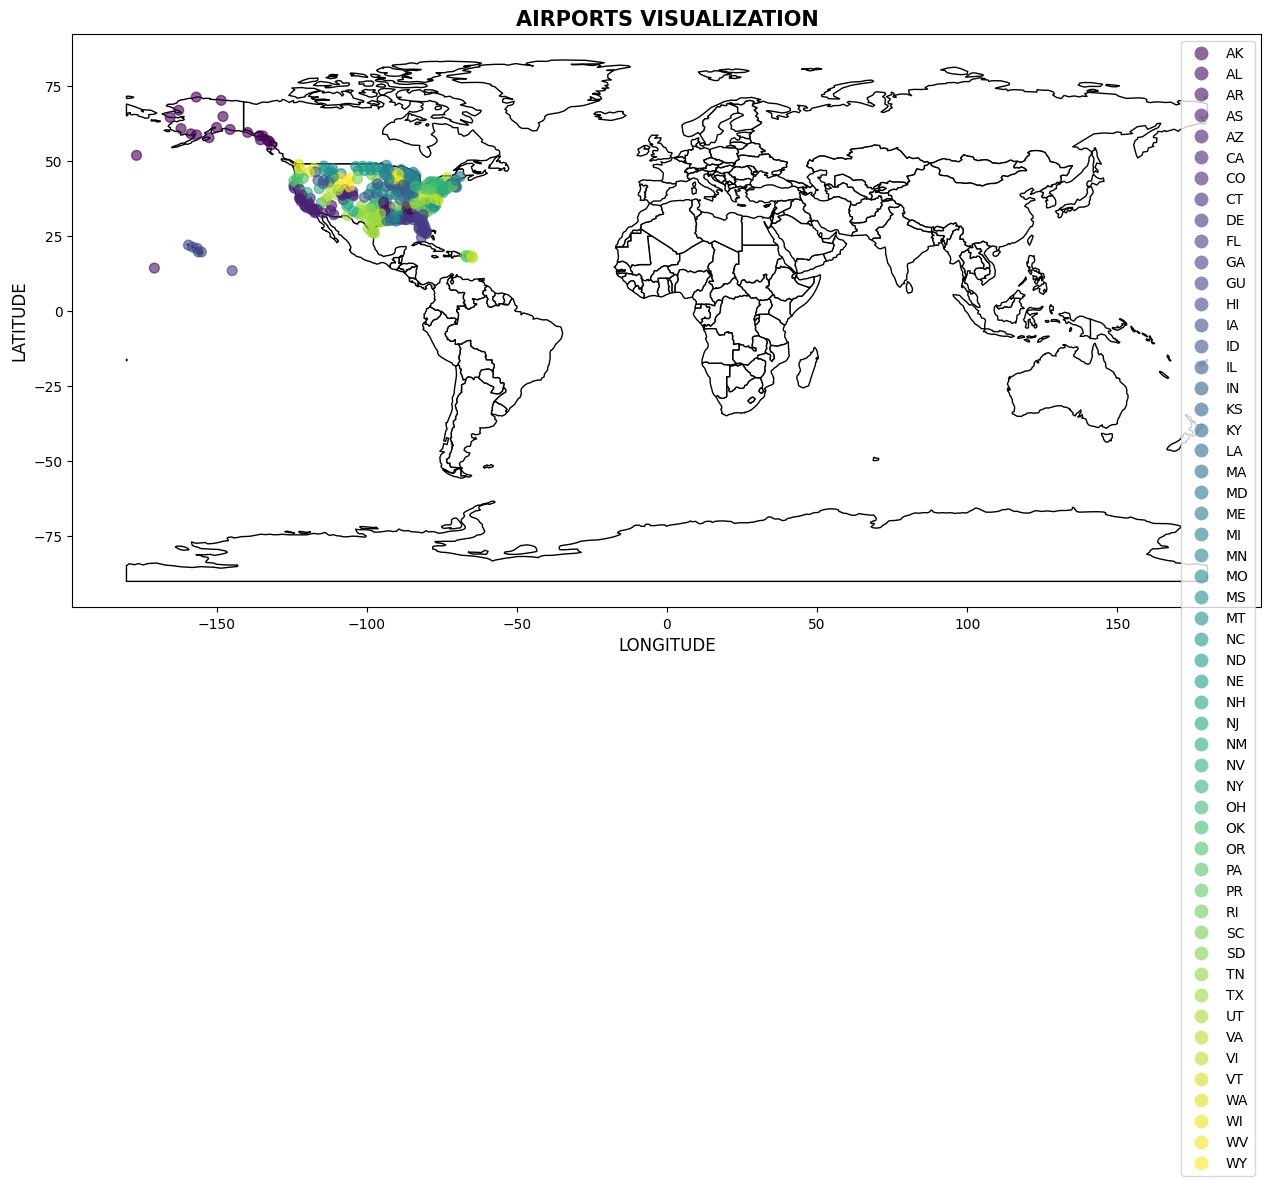

In [40]:
airports_geo_dataframe = gpd.GeoDataFrame(airports_csv, geometry=gpd.points_from_xy(airports_csv.LONGITUDE, airports_csv.LATITUDE))

# Create a world map as the base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize = (25, 10))  # Adjust the size as needed
base = world.plot(ax = ax, color = 'white', edgecolor = 'black')

# Plot AQI values with improved aesthetics
airports_geo_dataframe.plot(ax = base, column = 'STATE', legend = True, cmap = 'viridis', markersize = 50, alpha = 0.6)

# Set plot title and labels
plt.title('AIRPORTS VISUALIZATION', fontsize = 15, fontweight = 'bold')
plt.xlabel('LONGITUDE', fontsize = 12)
plt.ylabel('LATITUDE', fontsize = 12)
plt.tight_layout()
plt.show()

Visualizing the number of flights from each airport

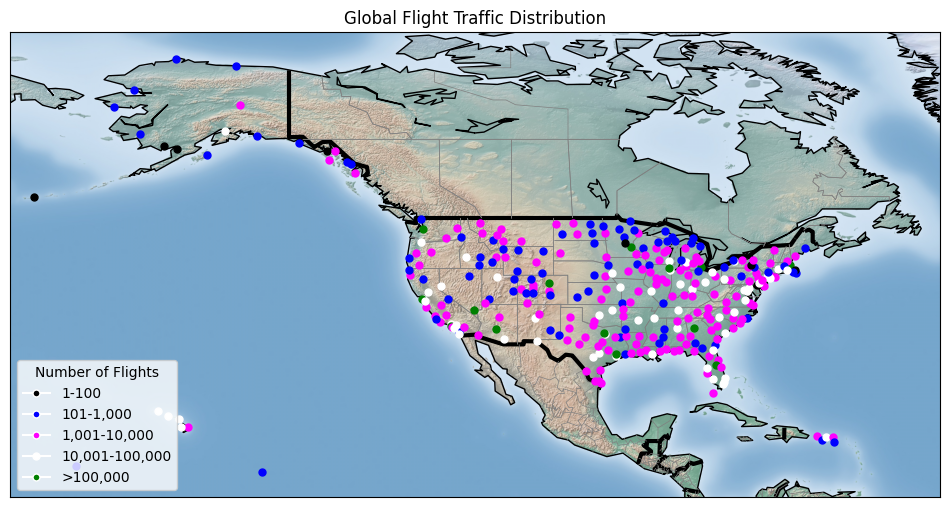

In [41]:
# Calculate the number of flights from each airport
origin_airport_flights = flights_csv['ORIGIN_AIRPORT'].value_counts()

flight_colors = ['black', 'blue', 'magenta', 'white', 'green']

# Define a function to categorize flight counts
def categorize_flight_count(flight_count):
    range = [(1, 100), (101, 1000), (1001, 10000), (10001, 100000), (100001, np.inf)]
    for i, (lower_count, upper_count) in enumerate(range):
        if lower_count <= flight_count <= upper_count:
            return i
    return len(range) - 1

# Configure the map
fig, ax = plt.subplots(figsize=(12, 8))
earth_map = Basemap(llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75)
earth_map.shadedrelief()
earth_map.drawcoastlines()
earth_map.drawcountries(linewidth=3)
earth_map.drawstates(color='gray')

# Plotting the airports
for _, airport in airports_csv.iterrows():
    x, y = earth_map(airport['LONGITUDE'], airport['LATITUDE'])
    flight_count = origin_airport_flights.get(airport['IATA_CODE'], 0)
    category = categorize_flight_count(flight_count)
    earth_map.plot(x, y, marker='o', color=flight_colors[category], markersize=5)

# Create a custom legend
legend_labels = ['1-100', '101-1,000', '1,001-10,000', '10,001-100,000', '>100,000']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5) for color in flight_colors]
ax.legend(legend_handles, legend_labels, title='Number of Flights', loc='lower left', frameon=True)

plt.title('Global Flight Traffic Distribution')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Load the dataset
# flights_csv = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction_dataset/flights.csv')

# Group by airline and month, calculate average delay
grouped_data = flights_csv.groupby(['AIRLINE', 'MONTH']).agg({'DEPARTURE_DELAY': 'mean'}).reset_index()

# Create a mapping dictionary for airline abbreviations to full names
airline_names = {
    'AA': 'American Airlines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue Airways',
    'DL': 'Delta Air Lines',
    'EV': 'ExpressJet Airlines',
    'F9': 'Frontier Airlines',
    'HA': 'Hawaiian Airlines',
    'MQ': 'Envoy Air',
    'NK': 'Spirit Airlines',
    'OO': 'SkyWest Airlines',
    'UA': 'United Airlines',
    'US': 'US Airways',
    'VX': 'Virgin America',
    'WN': 'Southwest Airlines'
}

# Map airline abbreviations to full names
grouped_data['AIRLINE_NAME'] = grouped_data['AIRLINE'].map(airline_names)

# Plot the time series for each airline with full names
fig = px.line(grouped_data, x='MONTH', y='DEPARTURE_DELAY', color='AIRLINE_NAME',
              labels={'DEPARTURE_DELAY': 'Average Delay', 'MONTH': 'Month'},
              title='Average Flight Delay Over Months for Each Airline')
fig.show()


Using Folium

In [42]:
# Set the boundaries for the USA
us_bounds = [(24.396308, -125.000000), (49.384358, -66.934570)]

# Create a map centered on the USA
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4, max_bounds=True, max_bounds_viscosity=1.0)

# Add airport markers to the map
for _, row in airports_csv.iterrows():
    latitude, longitude = row['LATITUDE'], row['LONGITUDE']

    # Check if the point is within the USA boundaries
    if us_bounds[0][0] <= latitude <= us_bounds[1][0] and us_bounds[0][1] <= longitude <= us_bounds[1][1]:
        folium.Marker([latitude, longitude], popup=row['AIRPORT']).add_to(us_map)

# Display the map
display(us_map)

In [18]:
import folium
import pandas as pd

# Calculate the number of flights from each airport
origin_airport_flights = flights_csv['ORIGIN_AIRPORT'].value_counts()

# Filter out rows with missing latitude or longitude
airports_csv = airports_csv.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Initialize a base map centered around the first airport
m = folium.Map(location=[airports_csv.iloc[0]['LATITUDE'], airports_csv.iloc[0]['LONGITUDE']], zoom_start=4)

# Loop through each airport in the dataset
for i, airport in airports_csv.iterrows():
    # Check if the airport code exists in the flights dataset
    if airport['IATA_CODE'] in origin_airport_flights.index:
        # Calculate average flight delay for the airport
        avg_delay = flights_csv[flights_csv['ORIGIN_AIRPORT'] == airport['IATA_CODE']]['DEPARTURE_DELAY'].mean()

        # Calculate bubble size based on the number of flights
        bubble_size = origin_airport_flights[airport['IATA_CODE']] / 5000

        # Calculate bubble color based on the average delay
        flight_color = 'green' if avg_delay < 0 else 'orange' if avg_delay <= 10 else 'red'

        # Create a popup with information including average delay
        popup_text = f"{airport['AIRPORT']} ({airport['IATA_CODE']})<br>Flights: {origin_airport_flights[airport['IATA_CODE']]}<br>Avg Delay: {avg_delay:.2f} minutes"

        # Add markers directly to the map
        folium.CircleMarker(location=[airport['LATITUDE'], airport['LONGITUDE']],
                            radius=bubble_size,
                            color=flight_color,
                            fill=True,
                            fill_color=flight_color,
                            fill_opacity=0.7,
                            popup=popup_text).add_to(m)

# Display the map
m



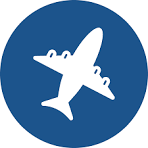
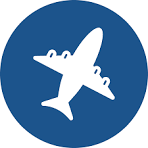
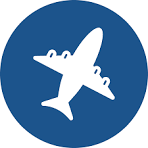
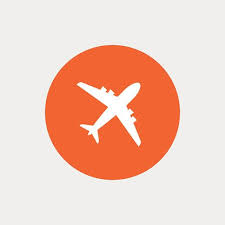
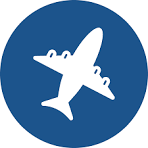
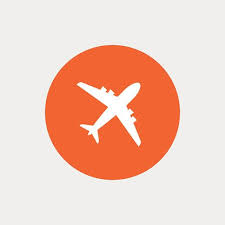
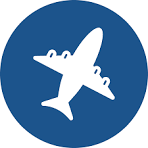
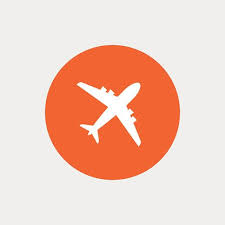
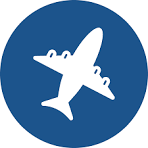
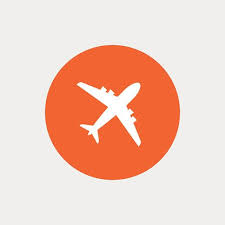
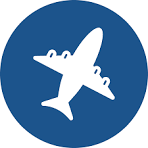
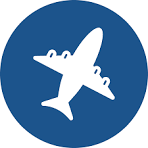
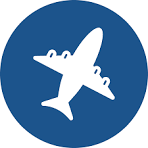
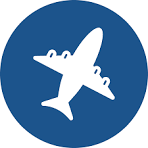
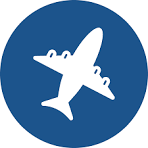
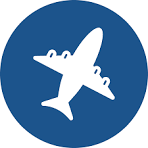
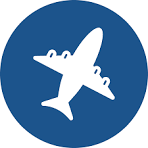
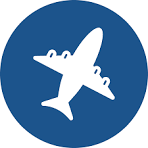
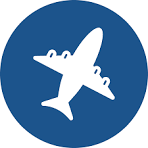
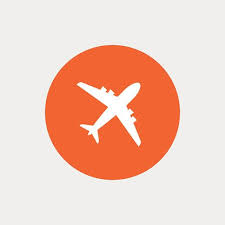
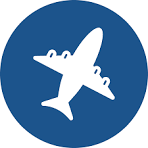
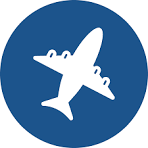
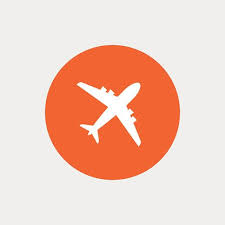
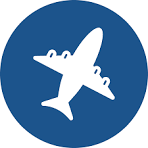
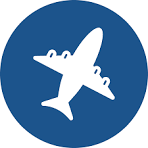
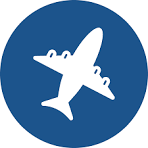
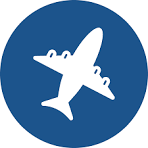
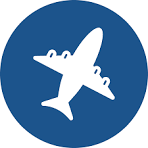
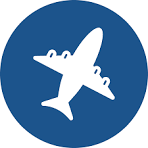
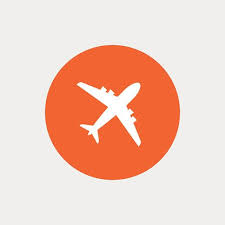
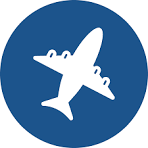
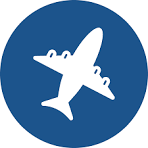
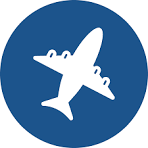
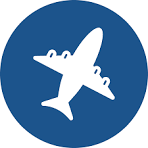
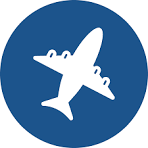
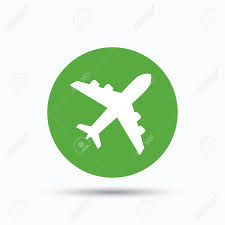
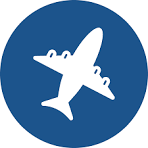
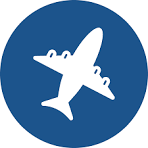
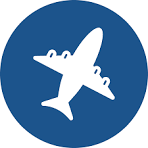
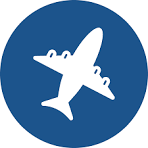
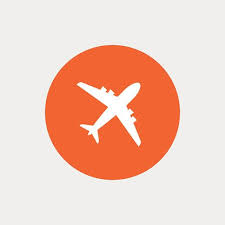
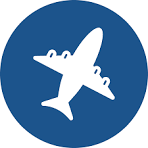
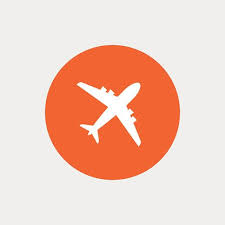
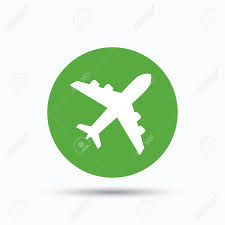
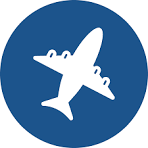
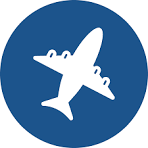
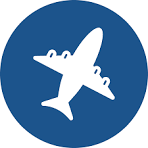
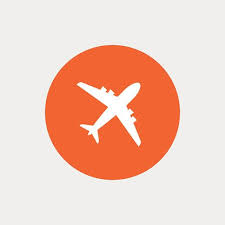
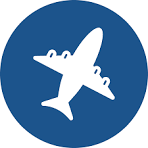
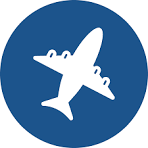
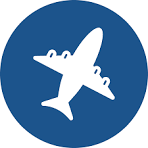
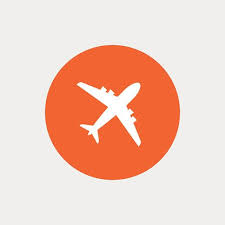
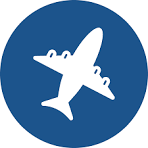
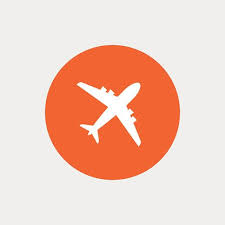
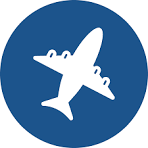
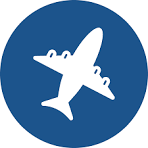
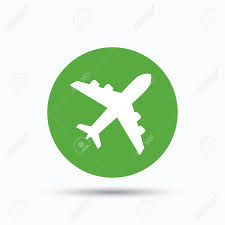
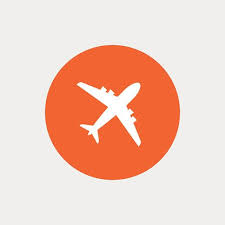
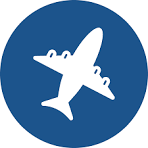
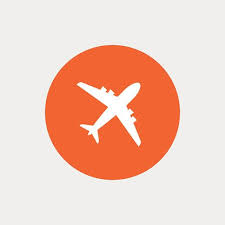
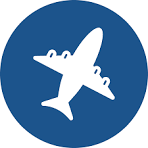
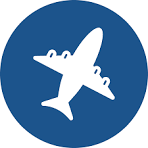
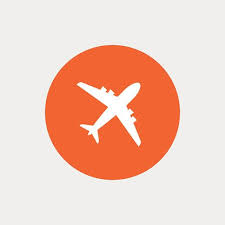
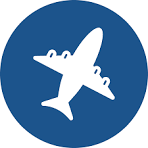
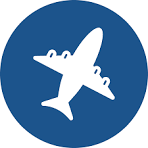
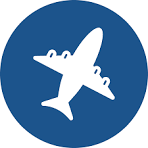
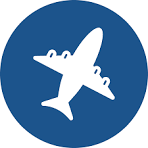
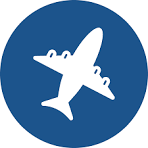
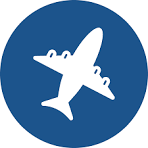
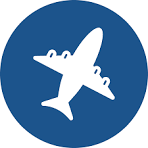
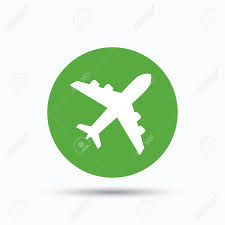
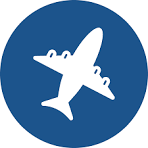
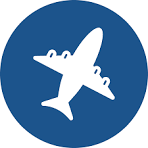
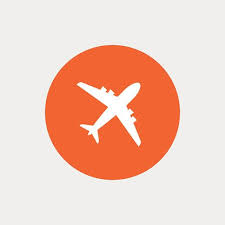
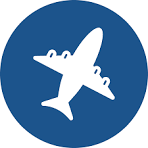
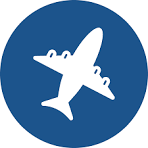
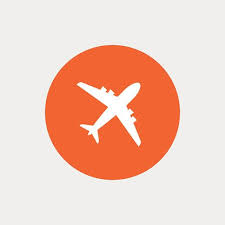
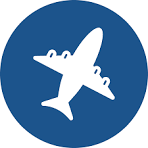
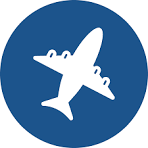
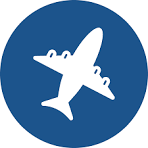
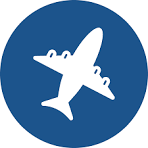
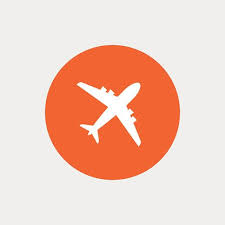
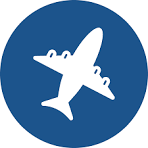
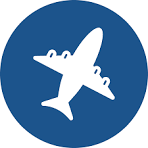
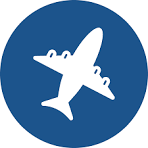
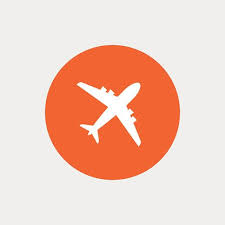
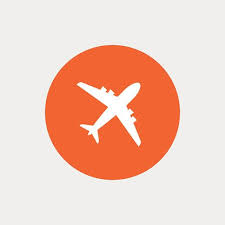
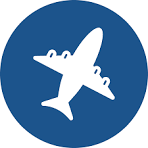
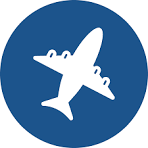
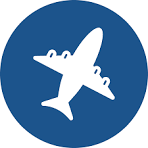
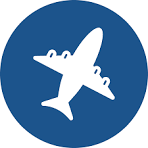
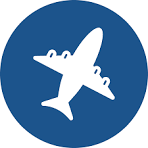
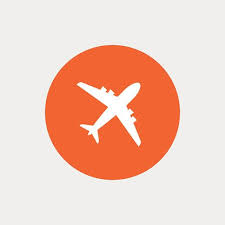
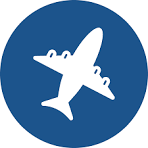
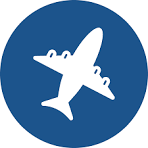
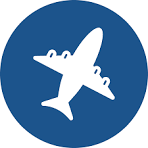
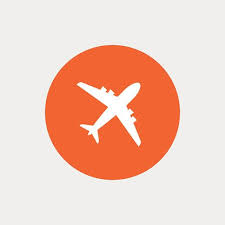
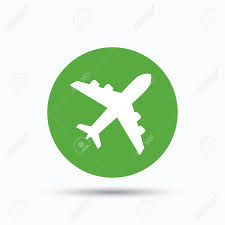
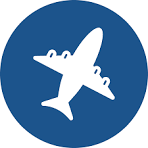
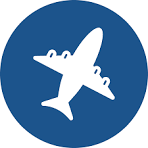
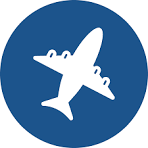
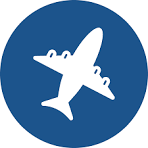
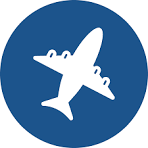
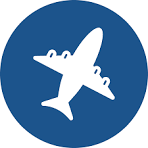
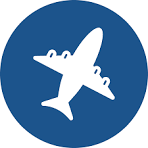
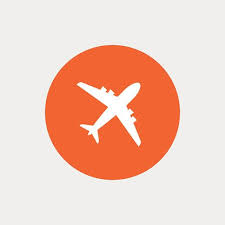
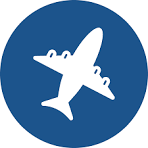
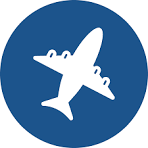
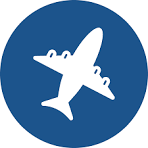
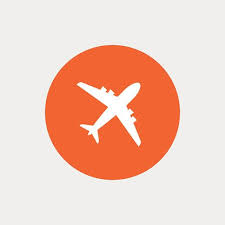
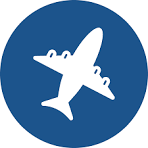
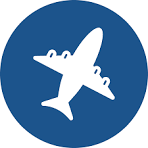
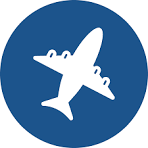
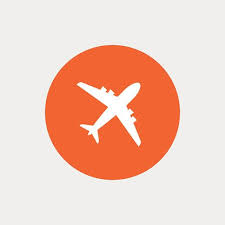
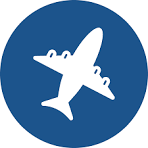
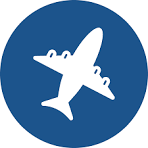
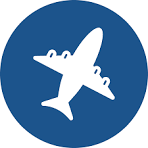
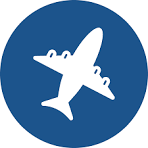
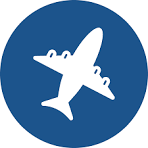
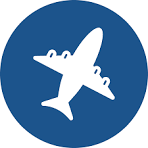
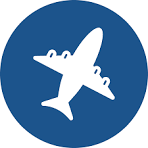
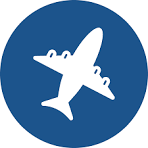
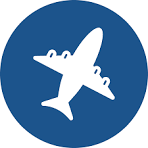
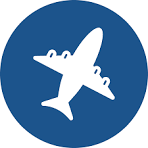
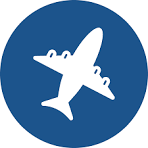
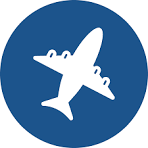
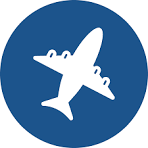
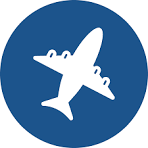
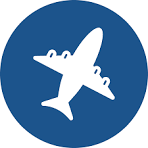
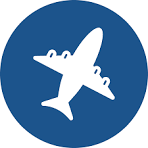
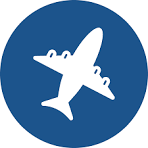
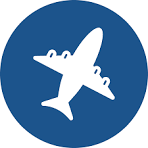
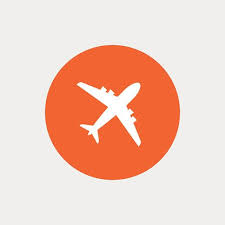
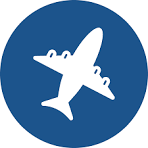
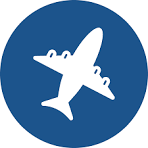
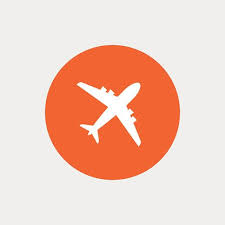
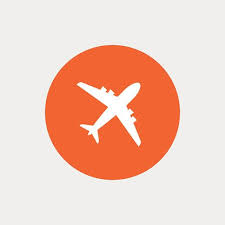
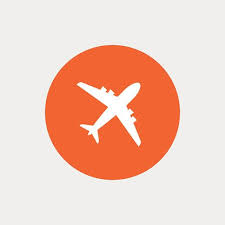
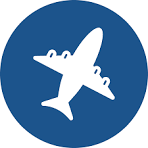
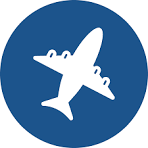
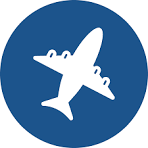
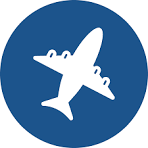
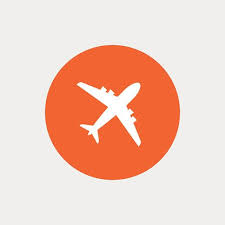
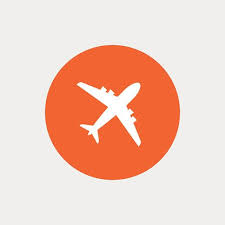
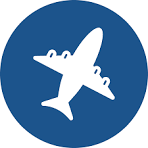
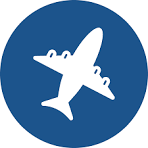
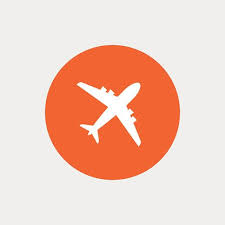
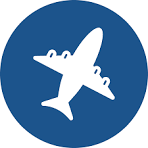
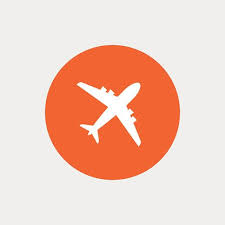
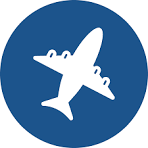
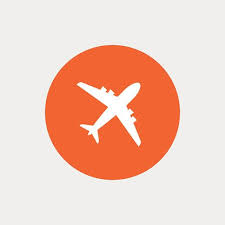
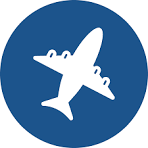
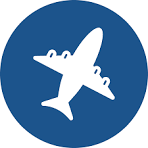
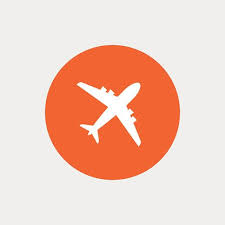
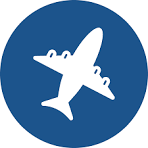
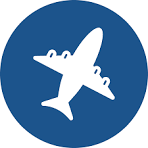
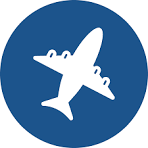
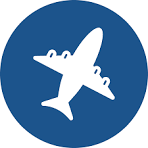
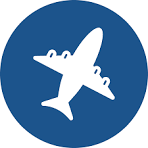
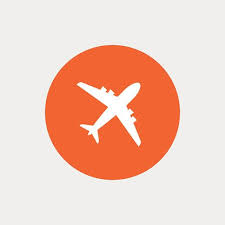
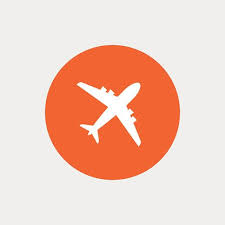
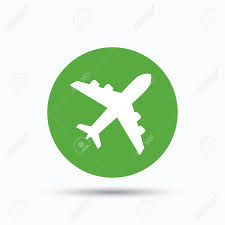
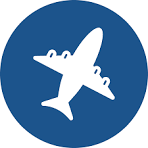
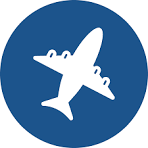
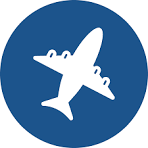
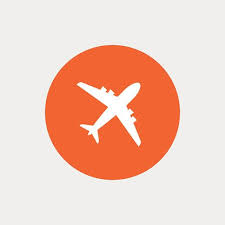
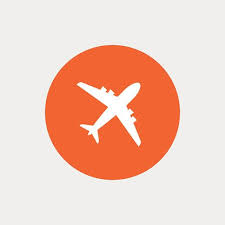
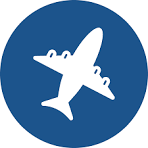
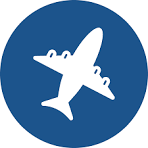
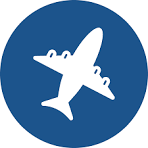
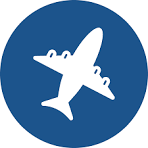
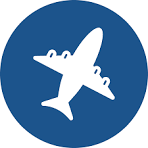
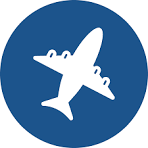
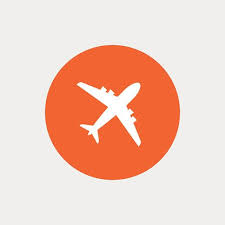
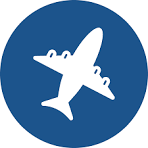
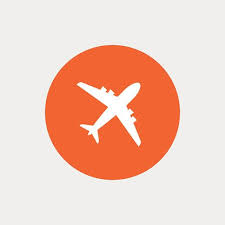
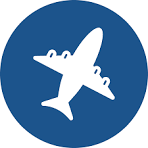
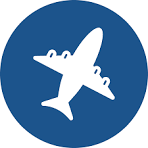
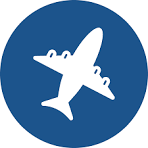
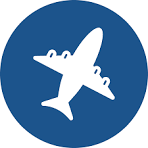
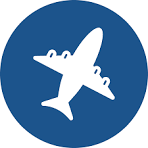
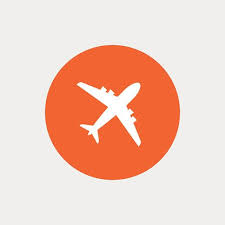
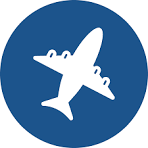
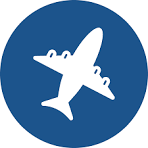
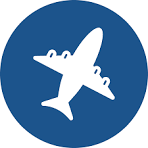
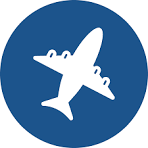
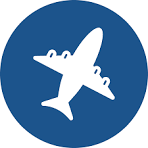
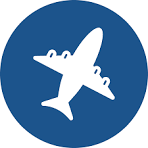
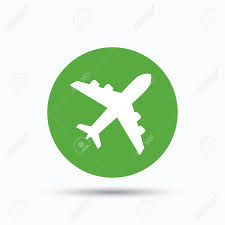
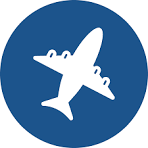
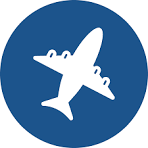
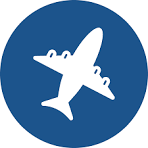
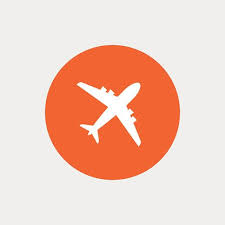
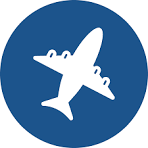
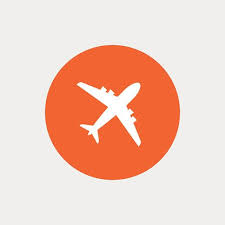
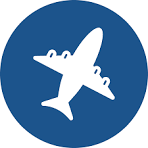
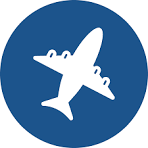
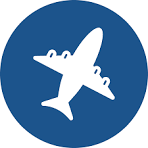
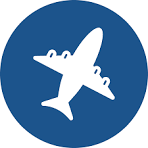
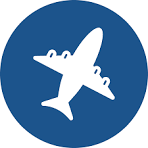
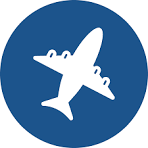
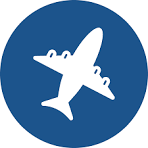
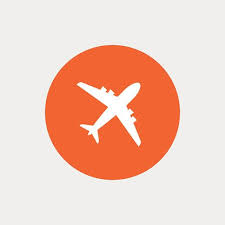
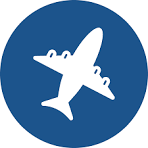
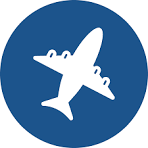
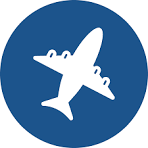
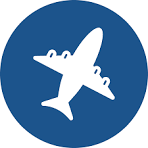
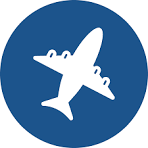
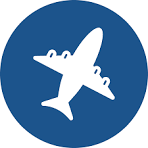
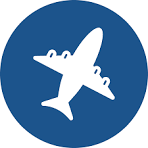
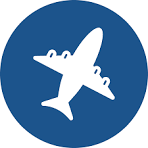
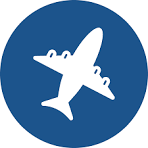
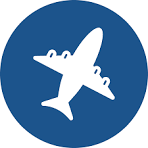
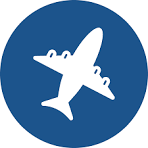
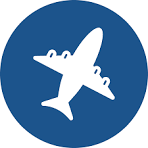
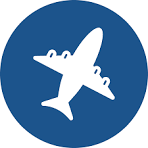
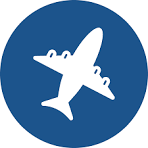
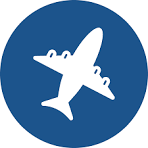
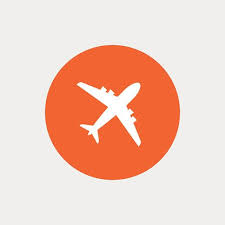
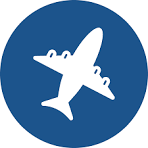
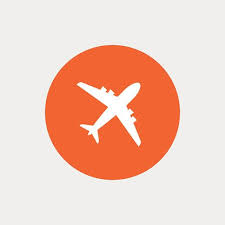
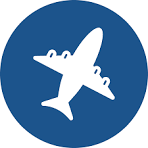
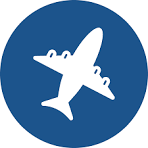
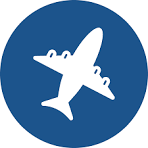
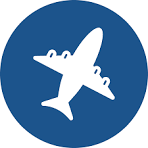
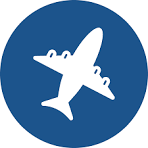
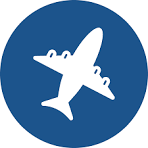
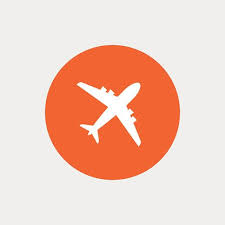
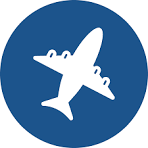
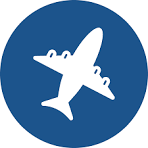
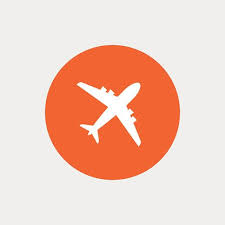
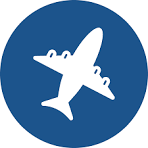
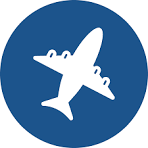
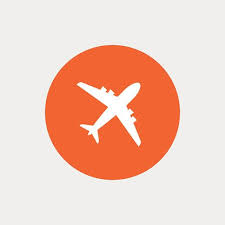
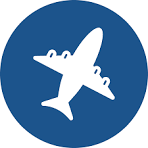
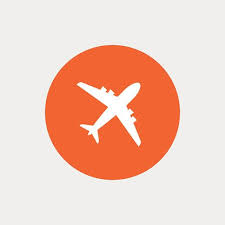
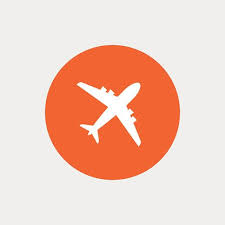
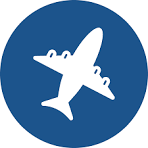
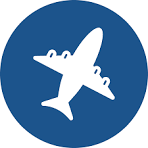
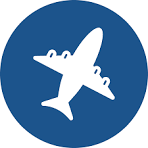
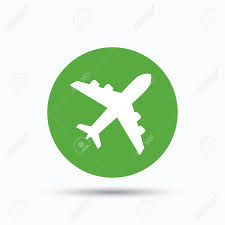
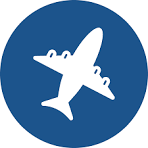
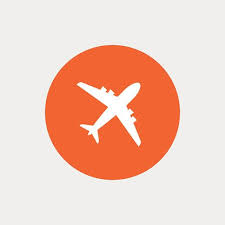
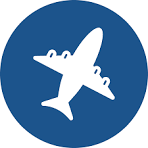
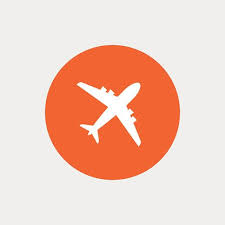
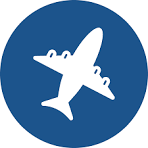
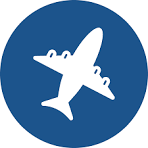
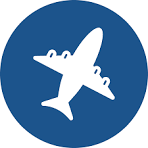
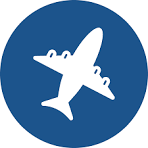
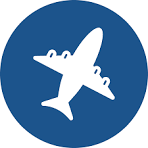
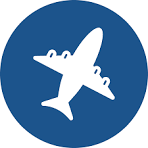
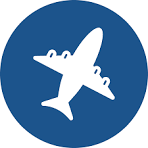
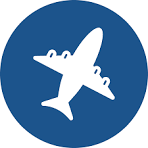
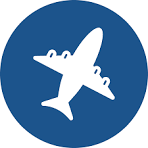
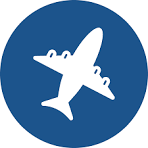
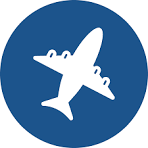
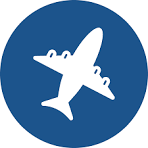
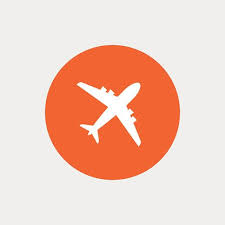
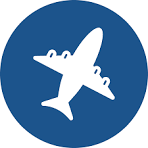
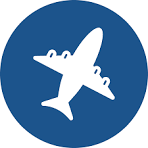
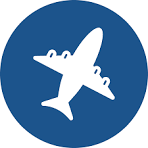
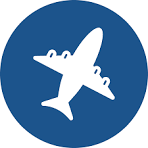
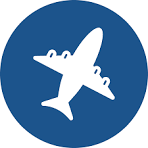
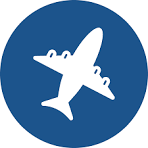
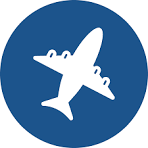
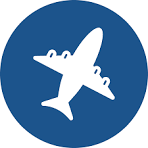
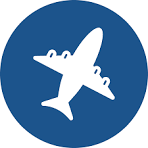
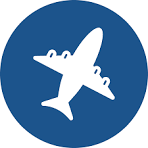
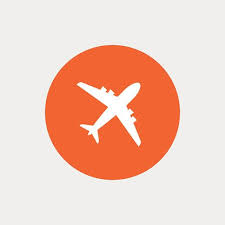
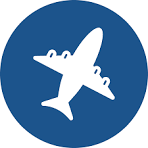
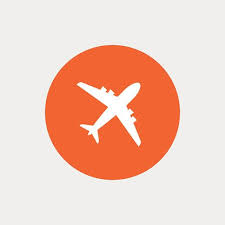
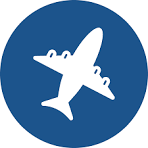
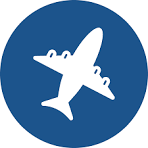
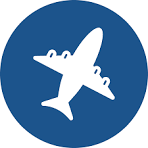
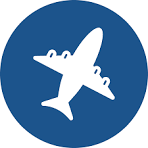
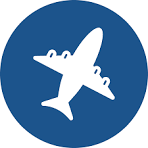
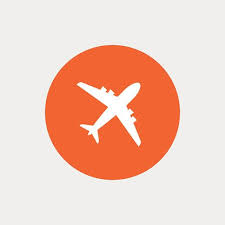
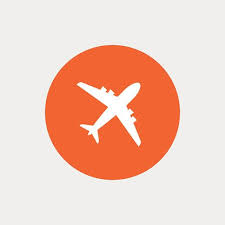
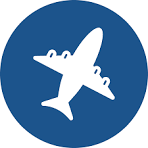
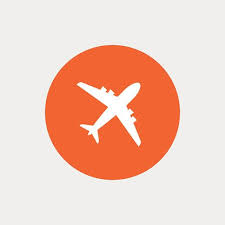
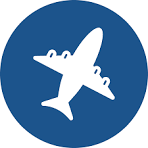
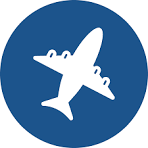
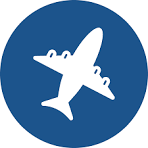
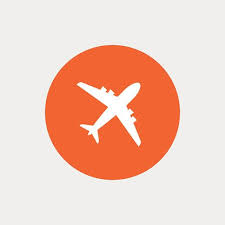
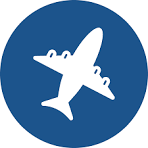
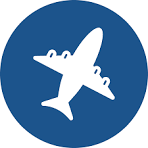
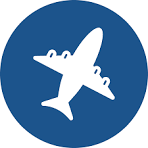
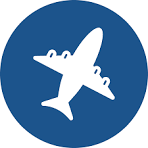
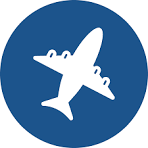
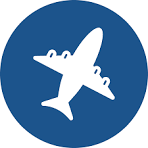
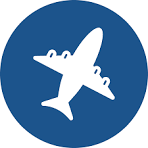
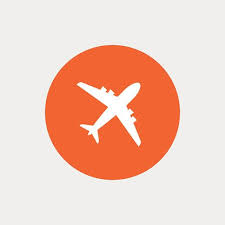
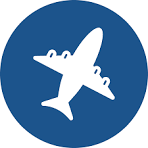
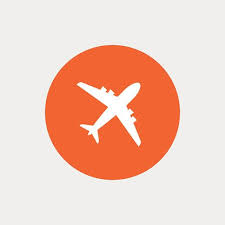
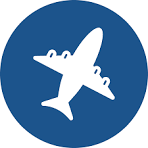
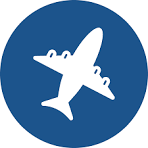
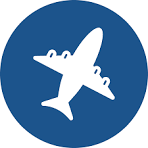
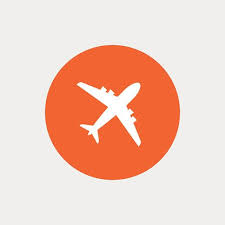
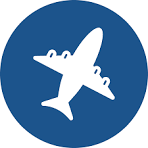
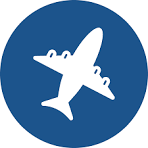
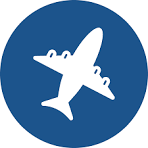
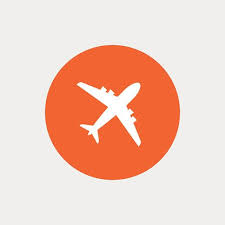
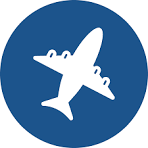
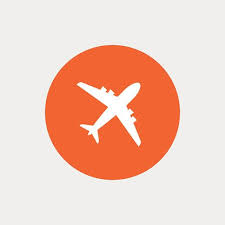
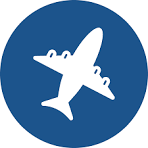
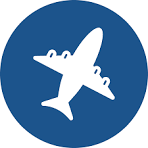
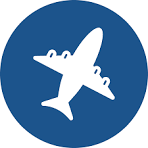
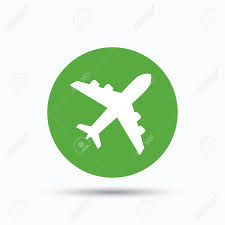
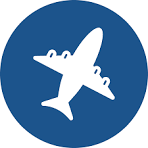
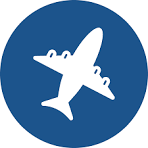
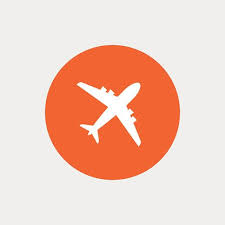
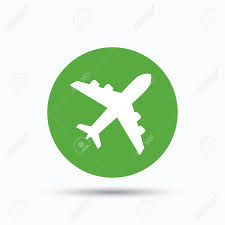
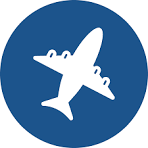
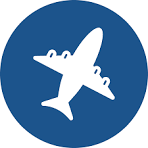
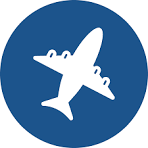
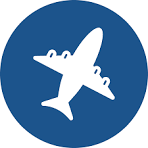
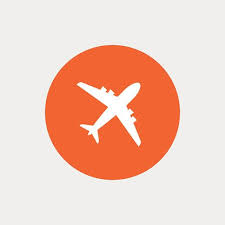
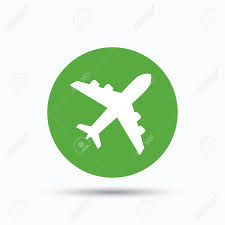
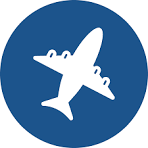

In [19]:
import folium
from folium import plugins
from branca.colormap import LinearColormap
import pandas as pd

# Calculate the number of flights from each airport
origin_airport_flights = flights_csv['ORIGIN_AIRPORT'].value_counts()

# Filter out rows with missing latitude or longitude
airports_csv = airports_csv.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Initialize a base map centered around the first airport
m = folium.Map(location=[airports_csv.iloc[0]['LATITUDE'], airports_csv.iloc[0]['LONGITUDE']], zoom_start=4)

# Create a plugin to cluster the markers for better visualization
marker_cluster = plugins.MarkerCluster(control=False).add_to(m)  # Set control=False to hide default control

# Define a color scale based on the number of airports
color_scale = LinearColormap(['green', 'yellow', 'red'], vmin=0, vmax=max(origin_airport_flights))

# Loop through each airport in the dataset
for i, airport in airports_csv.iterrows():
    # Check if the airport code exists in the flights dataset
    if airport['IATA_CODE'] in origin_airport_flights.index:
        # Calculate average flight delay for the airport
        avg_delay = flights_csv[flights_csv['ORIGIN_AIRPORT'] == airport['IATA_CODE']]['DEPARTURE_DELAY'].mean()

        # Calculate bubble size based on the number of flights
        bubble_size = origin_airport_flights[airport['IATA_CODE']] / 5000

        # Calculate bubble color based on the average delay
        flight_color = 'green' if avg_delay < 0 else 'blue' if avg_delay <= 10 else 'orange'

        # Create a popup with information including average delay
        popup_text = f"{airport['AIRPORT']} ({airport['IATA_CODE']})<br>Flights: {origin_airport_flights[airport['IATA_CODE']]}<br>Avg Delay: {avg_delay:.2f} minutes"

        # Determine the icon color based on the flight_color
        icon_color = 'green' if flight_color == 'green' else 'blue' if flight_color == 'blue' else 'orange'

        # Create a custom flight marker with the correct color
        icon = folium.CustomIcon(icon_image=f'/content/drive/MyDrive/Flight_delay_prediction_dataset/flighticon_{icon_color}.png',
                                 icon_size=(20, 20))

        marker = folium.Marker(location=[airport['LATITUDE'], airport['LONGITUDE']],
                              popup=popup_text,
                              icon=icon)
        marker.add_to(marker_cluster)

# Add the marker cluster to the map
m.add_child(marker_cluster)

# Add the color scale to the map
m.add_child(color_scale)

# Display the map
m





**Regression Analysis**

In [43]:
label_encoder = LabelEncoder()

In [44]:
# Applying Label encoder to convert text values to numbers for the total_flight_info dataset
total_flight_info['AIRLINE']= label_encoder.fit_transform(total_flight_info['AIRLINE'])
total_flight_info['ORIGIN_AIRPORT'] = label_encoder.fit_transform(total_flight_info['ORIGIN_AIRPORT'])
total_flight_info['DESTINATION_AIRPORT'] = label_encoder.fit_transform(total_flight_info['DESTINATION_AIRPORT'])

In [45]:
# Printing the information of the total_flight_info dataframe to know whether datatypes of all the columns are in the numbers or not
total_flight_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   YEAR                  int64  
 1   MONTH                 int64  
 2   DAY                   int64  
 3   ORIGIN_AIRPORT        int64  
 4   DESTINATION_AIRPORT   int64  
 5   DEPARTURE_DELAY       float64
 6   ARRIVAL_DELAY         float64
 7   AIRLINE               int64  
 8   IS_ARRIVAL_DELAYED    int64  
 9   IS_DEPARTURE_DELAYED  int64  
 10  IS_DELAYED            int64  
dtypes: float64(2), int64(9)
memory usage: 478.1 MB


**Regression starts to predict Arrival Delay**

Applying Label encoder to convert text values to numbers



In [46]:
# Splitting the dataset inorder to predict the ARRIVAL_DELAY
X = total_flight_info.drop(['ARRIVAL_DELAY', 'IS_ARRIVAL_DELAYED', 'IS_DEPARTURE_DELAYED', 'IS_DELAYED'], axis = 1)
y = total_flight_info['ARRIVAL_DELAY']

In [47]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [48]:
# Applying Standard Scalar
standard_scaler = StandardScaler()
X_train_sc = standard_scaler.fit_transform(X_train)
X_test_sc = standard_scaler.transform(X_test)

Applying Linear Regression

In [49]:
linear_regression = LinearRegression()
result = linear_regression.fit(X_train_sc,y_train)
y_pred = result.predict(X_test_sc)

print ('Mean Absolute Error:' ,  mean_absolute_error(y_test, y_pred))
print ('Mean Square Error:' , mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2 Score:' , r2_score(y_test, y_pred))

Mean Absolute Error: 9.095776182106292
Mean Square Error: 167.45313957376632
Root Mean Square Error: 12.940368602700865
R2 Score: 0.8921345075722292


Applying the Decision Tree Regression

In [50]:
decision_tree_regression = DecisionTreeRegressor(random_state = 2)
result = decision_tree_regression.fit(X_train_sc,y_train)
y_pred = result.predict(X_test_sc)

print ('Mean Absolute Error:',  mean_absolute_error(y_test, y_pred))
print ('Mean Square Error:' , mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2 Score:' , r2_score(y_test, y_pred))

Mean Absolute Error: 12.147500393937733
Mean Square Error: 302.249800002462
Root Mean Square Error: 17.38533289881048
R2 Score: 0.8053047939474504


Applying Polynomial Regression

In [51]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(X_train_sc)
x_test_poly = poly.transform(X_test_sc)

model = LinearRegression().fit(x_train_poly, y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

print ('Mean Absolute Error:' ,  mean_absolute_error(y_test, y_test_pred))
print ('Mean Square Error:' , mean_squared_error(y_test, y_test_pred))
print('Root Mean Square Error:' , np.sqrt(mean_squared_error(y_test, y_test_pred)))
print ('R2 Score:' , r2_score(y_test, y_test_pred))

Mean Absolute Error: 9.075968848951778
Mean Square Error: 166.78878741537832
Root Mean Square Error: 12.914673337540455
R2 Score: 0.8925624522073217


**Regression starts to predict on IS_ARRIVAL_DELAYED**

In [52]:
# Splitting the dataset inorder to predict the IS_ARRIVAL_DELAYED
X = total_flight_info.drop(['ARRIVAL_DELAY','IS_ARRIVAL_DELAYED', 'IS_DEPARTURE_DELAYED', 'IS_DELAYED'],axis = 1)
y = total_flight_info['IS_ARRIVAL_DELAYED']

In [53]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [54]:
# Applying Standard Scalar
standard_scaler = StandardScaler()
X_train_sc = standard_scaler.fit_transform(X_train)
X_test_sc = standard_scaler.transform(X_test)

Applying Logistic Regression

In [55]:
logistic_regression = LogisticRegression(random_state = 0)
result = logistic_regression.fit(X_train_sc, y_train)
y_pred = result.predict(X_test_sc)
score = result.score(X_test_sc,y_test)
score

0.8224687859057832

Applying Naive Bayes

In [56]:
naive_bayes = GaussianNB()
result = naive_bayes.fit(X_train_sc,y_train)
y_pred = result.predict(X_test)
score = result.score(X_test_sc,y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.8141447721179624

**Regression starts to predict departure delay**

In [57]:
# Splitting the dataset inorder to predict the DEPARTURE_DELAY
X = total_flight_info.drop(['DEPARTURE_DELAY','IS_ARRIVAL_DELAYED', 'IS_DEPARTURE_DELAYED', 'IS_DELAYED'], axis = 1)
y = total_flight_info['DEPARTURE_DELAY']

In [58]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [59]:
# Applying Standard Scalar
standard_scaler = StandardScaler()
X_train_sc = standard_scaler.fit_transform(X_train)
X_test_sc = standard_scaler.transform(X_test)

Applying Linear Regression

In [60]:
linear_regression = LinearRegression()
result = linear_regression.fit(X_train_sc, y_train)
y_pred = result.predict(X_test_sc)

print ('Mean Absolute Error:',  mean_absolute_error(y_test, y_pred))
print ('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.541545550836355
Mean Square Error: 147.69415036871865
Root Mean Square Error: 12.152948217149559
R2 Score: 0.8922032840284407


Applying the Decision Tree Regression

In [61]:
decision_tree_regression = DecisionTreeRegressor(random_state = 2)
result = decision_tree_regression.fit(X_train_sc, y_train)
y_pred = result.predict(X_test_sc)

print ('Mean Absolute Error:',  mean_absolute_error(y_test, y_pred))
print ('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.277897640021159
Mean Square Error: 193.41435789462597
Root Mean Square Error: 13.907349060645094
R2 Score: 0.858833728006574


Applying Polynomial Regression

In [62]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(X_train_sc)
x_test_poly = poly.transform(X_test_sc)

model = LinearRegression().fit(x_train_poly, y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

print ('Mean Absolute Error:',  mean_absolute_error(y_test, y_test_pred))
print ('Mean Square Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print ('R2 Score:', r2_score(y_test, y_test_pred))

Mean Absolute Error: 8.197050634356307
Mean Square Error: 136.55429528485863
Root Mean Square Error: 11.685644838213193
R2 Score: 0.9003338686957502


**Regression starts to predict IS_DEPARTURE_DELAYED**

In [63]:
# Splitting the dataset inorder to predict the IS_DEPARTURE_DELAYED
X = total_flight_info.drop(['DEPARTURE_DELAY', 'IS_ARRIVAL_DELAYED', 'IS_DEPARTURE_DELAYED', 'IS_DELAYED'],axis = 1)
y = total_flight_info['IS_DEPARTURE_DELAYED']

In [64]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [65]:
# Applying Standard Scalar
standard_scaler = StandardScaler()
X_train_sc = standard_scaler.fit_transform(X_train)
X_test_sc = standard_scaler.transform(X_test)

Applying Logistic Regression

In [66]:
logistic_regression = LogisticRegression(random_state = 0)
result = logistic_regression.fit(X_train_sc, y_train)
y_pred = result.predict(X_test_sc)
score = result.score(X_test_sc,y_test)
score

0.8009513596323248

Applying Naive Bayes

In [67]:
naive_bayes = GaussianNB()
result = naive_bayes.fit(X_train_sc,y_train)
y_pred = result.predict(X_test)
score = result.score(X_test_sc,y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.7679249329758713

**Regression to predict the overall delay**

In [68]:
# Splitting the dataset inorder to predict the IS_DEPARTURE_DELAYED
X = total_flight_info.drop(['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'IS_ARRIVAL_DELAYED', 'IS_DEPARTURE_DELAYED', 'IS_DELAYED'], axis = 1)
y = total_flight_info['IS_DELAYED']

In [69]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [70]:
# Applying Standard Scalar
standard_scaler = StandardScaler()
X_train_sc = standard_scaler.fit_transform(X_train)
X_test_sc = standard_scaler.transform(X_test)

Applying logistic regression

In [71]:
logistic_regression = LogisticRegression(random_state = 0)
result = logistic_regression.fit(X_train_sc, y_train)
y_pred = result.predict(X_test_sc)
score = result.score(X_test_sc,y_test)
score

0.5405767905017235

In [81]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(result)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(result, file)

In [82]:
os.chdir("/content/drive/MyDrive/Flight_Delay_Prediction/templates")


html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Flight Delay Prediction</title>
    <style>
      body {
          font-family: sans-serif;
      }

      .jumbotron {
          background-color: #fcdddd54;
          padding: 15px;
          border-radius: 5px;
          margin-bottom: 15px; /* Added margin-bottom for spacing */
      }

      .container {
          max-width: 960px;
          margin: 0 auto;
      }

      h1 {
          font-family: Arial, sans-serif;
          font-size: 24px;
          font-weight: 900;
          text-align: center;
          color: black;
      }

      .jumbo p {
          text-align: left;
          margin-left: 2px; /* Corrected typo from '=;' to ';' */
      }

      p {
          font-size: 13px;
          margin-top: 40px;
          text-align: center;
          color: rgb(0, 0, 0);
      }

      form {
          margin-top: 15px;
      }

      .form-group {
          margin-bottom: 15px; /* Added margin-bottom for spacing */
      }

      .form-label {
          font-weight: bold;
      }

      .form-control {
          width: 100%;
          padding: 10px;
          border: 1px solid #ccc;
          border-radius: 5px;
          margin-bottom: 10px; /* Added margin-bottom for spacing */
      }

      .btn-primary {
          background-color: #007bff;
          color: white;
          padding: 10px 15px; /* Added padding for button */
          border: none; /* Remove border for button */
          border-radius: 5px;
          cursor: pointer; /* Add pointer on hover for button */
          display: block; /* Make the button block to occupy full width */
          width: 100%; /* Make the button full width */
          margin-top: 10px; /* Added margin-top for spacing */
      }

      /* Added hover effect for button */
      .btn-primary:hover {
          background-color: #0056b3;
      }

    </style>
</head>
<body>
    <div class="container">
        <div class="jumbotron">
            <h1>Flight Delay Prediction Form</h1>
            <form action="/predict" method="post">
                <div class="form-group">
                  <label class="form-label" for="origin_airport">Origin Airport:</label>
                  <select class="form-control" name="origin_airport" id="origin_airport">
                    <option value="">SELECT</option>
                      {% for airport in origin_airports %}
                        <option value="{{ airport }}">{{ airport }}</option>
                      {% endfor %}
                  </select>
                </div>

                <div class="form-group">
                  <label class="form-label" for="destination_airport">Destination Airport:</label>
                  <select class="form-control" name="destination_airport" id="destination_airport">
                    <option value="">SELECT</option>
                      {% for airport in destination_airports %}
                        <option value="{{ airport }}">{{ airport }}</option>
                      {% endfor %}
                  </select>
                </div>

                <div class="form-group">
                  <label class="form-label" for="airline">Airline:</label>
                  <select class="form-control" name="airline" id="airline">
                    <option value="">SELECT</option>
                      {% for airline in airlines %}
                        <option value="{{ airline }}">{{ airline }}</option>
                      {% endfor %}
                  </select>
                </div>

                <div class="form-group">
                  <label class="form-label" for="year">Year:</label>
                    <input class="form-control" type="number" id="year" name="year" required>
                </div>

                <div class="form-group">
                  <label class="form-label" for="month">Month:</label>
                    <input class="form-control" type="number" id="month" name="month" required>
                </div>

                <div class="form-group">
                  <label class="form-label" for="day">Day:</label>
                    <input class="form-control" type="number" id="day" name="day" required>
                </div>

                <input class="btn-primary" type="submit" value="Predict Delays">
            </form>
        </div>
    </div>
</body>
</html>
"""

# Save the HTML content to a file
with open('index.html', 'w') as file:
    file.write(html_content)

In [83]:
os.chdir("/content/drive/MyDrive/Flight_Delay_Prediction/templates")


html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prediction Result</title>
    <link rel="stylesheet" href="https://unpkg.com/leaflet@1.7.1/dist/leaflet.css"/>
    <style>
        #map {
            height: 600px; /* Adjust as needed */
        }
        .arrow-head {
            /* Create a right-pointing triangle */
            width: 0;
            height: 0;
            border-top: 10px solid transparent;
            border-bottom: 10px solid transparent;
            border-left: 15px solid blue;
        }
    </style>
</head>
<body>
    <h1>Prediction Result</h1>
    <p>The flight is predicted to be: <strong>{{ prediction }}</strong></p>
    <div id="map"></div>

    <!-- Leaflet JS -->
    <script src="https://unpkg.com/leaflet@1.7.1/dist/leaflet.js"></script>

    <script>
        var map = L.map('map').setView([20, 0], 2); // Center of the map

        L.tileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', {
            maxZoom: 19,
            attribution: '© OpenStreetMap contributors'
        }).addTo(map);

        var originLat = {{ origin_latitude }};
        var originLon = {{ origin_longitude }};
        var destLat = {{ destination_latitude }};
        var destLon = {{ destination_longitude }};

        var originMarker = L.marker([originLat, originLon]).addTo(map);
        originMarker.bindPopup("<b>Origin Airport</b>");

        var destinationMarker = L.marker([destLat, destLon]).addTo(map);
        destinationMarker.bindPopup("<b>Destination Airport</b>");

        var latlngs = [[originLat, originLon], [destLat, destLon]];
        var polyline = L.polyline(latlngs, {color: 'blue'}).addTo(map);

        // Calculate the bearing from the origin to the destination
        var angle = Math.atan2(destLon - originLon, destLat - originLat) * 180 / Math.PI;

        // Create an arrow icon
        var arrowIcon = L.divIcon({
            className: 'arrow-head',
            iconSize: [0, 0], // size of the icon
            iconAnchor: [2, 10], // point of the icon which will correspond to marker's location
            html: '<div style="transform: rotate(' + angle + 'deg);"></div>'
        });

        // Place the arrow icon at the end of the polyline
        var arrowMarker = L.marker(polyline.getLatLngs()[1], {icon: arrowIcon}).addTo(map);

        map.fitBounds(polyline.getBounds());
    </script>
</body>
</html>
"""

# Save the HTML content to a file
with open('result.html', 'w') as file:
    file.write(html_content)

In [21]:
pip install flask_ngrok

In [76]:
!mkdir templates

mkdir: cannot create directory ‘templates’: File exists


In [ ]:
os.chdir("/content/drive/MyDrive/Flight_Delay_Prediction")


from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle
import pandas as pd

app = Flask(__name__, template_folder='templates')
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods = ['GET'])
def home():
    unique_origin_airports = flights_csv['ORIGIN_AIRPORT'].unique().tolist()
    unique_destination_airports = flights_csv['DESTINATION_AIRPORT'].unique().tolist()
    unique_airlines = airlines_csv['AIRLINE'].unique().tolist()
    return render_template('index.html', origin_airports = unique_origin_airports, destination_airports = unique_destination_airports, airlines = unique_airlines)

@app.route('/predict', methods = ['POST'])
def predict():
  try:
    # Extract form data
    origin_airport = request.form['origin_airport']
    destination_airport = request.form['destination_airport']
    airline = request.form['airline']
    year = request.form['year']
    month = request.form['month']
    day = request.form['day']

    # Convert form data to model input format
    # Depending on your model, you might need to encode these variables or scale them
    origin_airport_encoded = label_encoder.fit_transform([origin_airport])[0]
    destination_airport_encoded = label_encoder.fit_transform([destination_airport])[0]
    airline_encoded = label_encoder.fit_transform([airline])[0]

    origin_latitude, origin_longitude = get_airport_coordinates(origin_airport, airports_csv)
    destination_latitude, destination_longitude = get_airport_coordinates(destination_airport, airports_csv)

    # Create a DataFrame from the input to match the training data format
    input_data = pd.DataFrame([[origin_airport_encoded, destination_airport_encoded, airline_encoded, year, month, day]],
                              columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE', 'YEAR', 'MONTH', 'DAY'])

    # Get predictions
    predictions = model.predict(input_data)
    prediction_text = 'Delayed' if predictions[0] == 1 else 'On time'

    # Render the results on the map (assuming you have latitude and longitude for airports)
    # You would need to have a mapping functionality ready in your 'index.html' to handle this
    return render_template('result.html',
                           prediction=prediction_text,
                           origin_latitude = origin_latitude,
                           origin_longitude = origin_longitude,
                           destination_latitude = destination_latitude,
                           destination_longitude = destination_longitude)
  except Exception as e:
        # Log the error for debugging
        print(e)
        # Return a user-friendly error message
        return render_template('result.html', prediction="An error occurred during prediction.")

def get_airport_coordinates(airport_code, airports_csv):
    matching_airport = airports_csv[airports_csv['IATA_CODE'] == airport_code]
    if not matching_airport.empty:
        latitude = matching_airport.iloc[0]['LATITUDE']
        longitude = matching_airport.iloc[0]['LONGITUDE']
        return latitude, longitude
    else:
        return None, None  # Or some default values, or raise an error

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e520-35-188-85-96.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [22]:
!pip install pyngrok==4.1.1

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=ca335524f986dffb02b64439827fabf46d7287cddd5bec76b347c6d16ec03109
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


In [79]:
!ngrok authtoken 2ZHVhe5M59groVgAevZ9nFjiMz5_37Y3UXdKo2RxQEew1Efia

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
#Using Synthetic DataSet find better patterns of data

In [85]:
total_flight_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   YEAR                  int64  
 1   MONTH                 int64  
 2   DAY                   int64  
 3   ORIGIN_AIRPORT        int64  
 4   DESTINATION_AIRPORT   int64  
 5   DEPARTURE_DELAY       float64
 6   ARRIVAL_DELAY         float64
 7   AIRLINE               int64  
 8   IS_ARRIVAL_DELAYED    int64  
 9   IS_DEPARTURE_DELAYED  int64  
 10  IS_DELAYED            int64  
dtypes: float64(2), int64(9)
memory usage: 478.1 MB


In [86]:
total_flight_info.min()

YEAR                    2015.0
MONTH                      1.0
DAY                        1.0
ORIGIN_AIRPORT             0.0
DESTINATION_AIRPORT        0.0
DEPARTURE_DELAY          -82.0
ARRIVAL_DELAY            -87.0
AIRLINE                    0.0
IS_ARRIVAL_DELAYED         0.0
IS_DEPARTURE_DELAYED       0.0
IS_DELAYED                 0.0
dtype: float64

In [87]:
total_flight_info.max()

YEAR                    2015.0
MONTH                     12.0
DAY                       31.0
ORIGIN_AIRPORT           318.0
DESTINATION_AIRPORT      318.0
DEPARTURE_DELAY         1988.0
ARRIVAL_DELAY           1971.0
AIRLINE                   13.0
IS_ARRIVAL_DELAYED         1.0
IS_DEPARTURE_DELAYED       1.0
IS_DELAYED                 1.0
dtype: float64

In [88]:
unique_values = total_flight_info['ORIGIN_AIRPORT'].unique()
unique_values

array([ 17, 107, 120, 234, 175, 237,  85, 221, 226, 266,  35, 284, 281,
       173, 105, 215, 248, 276, 287,  50, 285, 168,  84, 227,  86, 140,
       170, 183, 280, 222, 169, 305,   2, 191,  93,  39,  51, 192, 236,
       150,  20, 301, 292, 216, 113, 267,  22, 148, 165,  37, 255,  60,
       202, 224, 223, 203,  66,  72,  64, 109, 162, 137, 142,  38,  78,
       194,  52,  81, 214,  32, 245, 182, 269, 275, 225,  45, 247, 317,
       132, 304, 184, 241,  92, 156,  67,  99, 259, 274, 217,  49, 201,
        28, 212, 271,  91, 318, 123, 112, 161, 231, 136, 244, 181, 283,
       233, 164, 257,  26,  31, 196,  82, 228, 264,  96, 293, 151, 135,
       243, 316, 250,  14, 251, 298, 130, 261, 193, 219, 131,  21, 209,
        23, 145, 268, 213, 163, 277,  54, 290, 129, 114, 310,  24, 108,
        33, 115,  53, 179, 260,  90,  59, 126, 103,   0,  76,  58, 306,
       171, 111,  48, 252, 270,   8, 177, 143,  95, 288,  71, 232,  61,
       291,  19, 238, 206, 190, 117, 204,  69, 185,  79,  25,  3

In [89]:
unique_values_airlines = total_flight_info['AIRLINE'].unique()
unique_values_airlines

array([ 0,  4,  7,  8, 12, 13,  1, 11,  9,  5,  6, 10,  3,  2])

In [90]:
def generate_airport_id():
    # Assuming airport IDs are integers between 1000 and 9999
    return np.random.randint(0, 318)

def generate_float_data(mean, std_dev):
    # Generate a float value based on a normal distribution
    return np.random.normal(mean, std_dev)

def generate_distance():
    # Generate a realistic distance (in miles, for example)
    return np.random.randint(31, 4983)

def generate_binary():
    # Generate a binary value (0 or 1)
    return np.random.randint(0, 2)

def generate_airline_id():
    # Assuming airline IDs are integers between 100 and 999
    return np.random.randint(0, 13)

In [91]:
import numpy as np
import pandas as pd

# Airport encoding
airports = ['ANC', 'FAI', 'GEG', 'PDX', 'LAX', 'PHX', 'DEN', 'OAK', 'ONT',
       'SAN', 'BLI', 'SLC', 'SJC', 'LAS', 'EWR', 'MSP', 'PSP', 'SFO',
       'SNA', 'BUR', 'SMF', 'JNU', 'DCA', 'ORD', 'DFW', 'HNL', 'KTN',
       'LIH', 'SIT', 'OGG', 'KOA', 'TUS', 'ABQ', 'MCI', 'DTW', 'BOS',
       'BWI', 'MCO', 'PHL', 'IAH', 'ATL', 'TPA', 'STL', 'MSY', 'FLL',
       'SAT', 'AUS', 'IAD', 'JFK', 'BNA', 'RDU', 'CHS', 'MIA', 'OMA',
       'OKC', 'MKE', 'CLT', 'COS', 'CLE', 'FAT', 'JAC', 'HDN', 'HOU',
       'BOI', 'CVG', 'MDW', 'BZN', 'DAL', 'MSO', 'BIL', 'PSC', 'LGB',
       'SBA', 'SEA', 'OME', 'BRW', 'PSG', 'YAK', 'GST', 'TUL', 'LIT',
       'PIT', 'DSM', 'IND', 'CMH', 'ELP', 'RNO', 'SDF', 'MTJ', 'BUF',
       'MHT', 'BFL', 'MRY', 'SBP', 'DRO', 'YUM', 'GJT', 'FLG', 'ITO',
       'OTZ', 'GUM', 'PPG', 'LGA', 'SJU', 'PBI', 'JAX', 'RIC', 'BDL',
       'BHM', 'MEM', 'DAY', 'ORF', 'RSW', 'EGE', 'STT', 'ICT', 'GUC',
       'PNS', 'XNA', 'PVD', 'ALB', 'PWM', 'SYR', 'GSO', 'ROC', 'MDT',
       'MYR', 'GSP', 'ATW', 'MOB', 'AVL', 'HSV', 'SAV', 'MSN', 'JAN',
       'SGF', 'CAK', 'SRQ', 'GRR', 'FNT', 'TYS', 'AVP', 'FAR', 'BIS',
       'FSD', 'CAE', 'LEX', 'ROA', 'DLH', 'CHO', 'GRB', 'EVV', 'ABE',
       'CRW', 'CHA', 'TVC', 'LAN', 'FCA', 'BTV', 'RAP', 'SBN', 'ACY',
       'LBE', 'HPN', 'EAU', 'SPI', 'COD', 'PAH', 'CID', 'STC', 'ASE',
       'PIA', 'MLI', 'MBS', 'FWA', 'MKG', 'CMX', 'LNK', 'CWA', 'AZO',
       'BMI', 'LSE', 'RST', 'MQT', 'ERI', 'SCE', 'ELM', 'MHK', 'TTN',
       'CMI', 'SUX', 'ALO', 'DBQ', 'COU', 'TOL', 'LBB', 'MAF', 'AMA',
       'EUG', 'RDM', 'CLD', 'SAF', 'SMX', 'SCC', 'MFE', 'TLH', 'GPT',
       'VPS', 'LFT', 'SHV', 'BTR', 'CRP', 'BRO', 'MGM', 'MLU', 'TYR',
       'LAW', 'PIB', 'BPT', 'MEI', 'LRD', 'AEX', 'GGG', 'GRK', 'CLL',
       'LCH', 'FSM', 'SPS', 'SJT', 'ACT', 'GCK', 'TXK', 'JLN', 'ROW',
       'GRI', 'ABI', 'MOT', 'HIB', 'ABR', 'BJI', 'IDA', 'INL', 'ISN',
       'HLN', 'GTF', 'IMT', 'BRD', 'GFK', 'RHI', 'DIK', 'STX', 'ILM',
       'DAB', 'MLB', 'TRI', 'EYW', 'GNV', 'FAY', 'AGS', 'PHF', 'OAJ',
       'DHN', 'VLD', 'BQK', 'CSG', 'EWN', 'GTR', 'ABY', 'MFR', 'CPR',
       'GCC', 'TWF', 'EKO', 'BTM', 'RKS', 'PIH', 'SUN', 'LWS', 'VEL',
       'CDC', 'CNY', 'SGU', 'WYS', 'ACV', 'MMH', 'CEC', 'RDD', 'OTH',
       'LAR', 'HYS', 'PUB', 'JMS', 'DVL', 'HRL', 'HOB', 'BQN', 'BET',
       'ADK', 'CDV', 'ADQ', 'DLG', 'AKN', 'WRG', 'PSE', 'ORH', 'SWF',
       'ILG', 'ISP', 'ACK', 'IAG', 'BGR', 'ESC', 'PLN', 'CIU', 'APN',
       'BGM', 'ITH', 'MVY', 'HYA'] # 317 airports
airport_encoding = {airport: i for i, airport in enumerate(airports)}

# Airline encoding
airlines = ['Alaska Airlines Inc.', 'Delta Air Lines Inc.', 'JetBlue Airways',
       'Skywest Airlines Inc.', 'United Air Lines Inc.', 'Virgin America',
       'American Airlines Inc.', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Spirit Air Lines',
       'Atlantic Southeast Airlines', 'American Eagle Airlines Inc.']
airline_encoding = {airline: i for i, airline in enumerate(airlines)}

# Functions to generate data
def generate_airport_id():
    airport = np.random.choice(airports)
    airport_id = airport_encoding[airport]
    return airport_id

def generate_airline_id():
    airline = np.random.choice(airlines)
    airline_id = airline_encoding[airline]
    return airline_id

def generate_float_data(min_value, max_value):
    return np.random.uniform(min_value, max_value)

def generate_binary():
    return np.random.randint(0, 2)

def generate_distance():
    return np.random.randint(31, 4983)

def generate_month():
  return np.random.randint(0,13)

def generate_day():
  return np.random.randint(0,32)

# Generate the synthetic dataframe
def generate_synthetic_data(num_rows):

    data = []
    for _ in range(num_rows):
        YEAR = 2015
        origin_airport_id = generate_airport_id()
        dest_airport_id = generate_airport_id()
        airline_id = generate_airline_id()

        departure_delay = generate_float_data(-82.0, 1988.0)
        arrival_delay = generate_float_data(-87.0, 1971.0)

        row = [YEAR, generate_month, generate_day, origin_airport_id, dest_airport_id, departure_delay,
               arrival_delay, airline_id, generate_binary(),
               generate_binary(), generate_binary()]

        data.append(row)

    columns = ['YEAR','MONTH','DAY','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
               'ARRIVAL_DELAY', 'AIRLINE', 'IS_ARRIVAL_DELAYED',
               'IS_DEPARTURE_DELAYED','IS_DELAYED']

    return pd.DataFrame(data, columns=columns)

In [92]:
synthetic_data = generate_synthetic_data(1000000)

In [ ]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   YEAR                  1000000 non-null  int64  
 1   MONTH                 1000000 non-null  object 
 2   DAY                   1000000 non-null  object 
 3   ORIGIN_AIRPORT        1000000 non-null  int64  
 4   DESTINATION_AIRPORT   1000000 non-null  int64  
 5   DEPARTURE_DELAY       1000000 non-null  float64
 6   ARRIVAL_DELAY         1000000 non-null  float64
 7   AIRLINE               1000000 non-null  int64  
 8   IS_ARRIVAL_DELAYED    1000000 non-null  int64  
 9   IS_DEPARTURE_DELAYED  1000000 non-null  int64  
 10  IS_DELAYED            1000000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.9+ MB


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Applying Label encoder to convert text values to numbers for the total_flight_info dataset
synthetic_data['AIRLINE']= label_encoder.fit_transform(synthetic_data['AIRLINE'])
synthetic_data['ORIGIN_AIRPORT'] = label_encoder.fit_transform(synthetic_data['ORIGIN_AIRPORT'])
synthetic_data['DESTINATION_AIRPORT'] = label_encoder.fit_transform(synthetic_data['DESTINATION_AIRPORT'])

**Regression starts to predict Arrival Delay**

Applying Label encoder to convert text values to numbers



In [ ]:
# Splitting the dataset inorder to predict the ARRIVAL_DELAY
X = synthetic_data.drop(['ARRIVAL_DELAY', 'IS_ARRIVAL_DELAYED', 'IS_DEPARTURE_DELAYED', 'IS_DELAYED'], axis = 1)
y = synthetic_data['ARRIVAL_DELAY']

In [ ]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   YEAR                  1000000 non-null  int64  
 1   MONTH                 1000000 non-null  object 
 2   DAY                   1000000 non-null  object 
 3   ORIGIN_AIRPORT        1000000 non-null  int64  
 4   DESTINATION_AIRPORT   1000000 non-null  int64  
 5   DEPARTURE_DELAY       1000000 non-null  float64
 6   ARRIVAL_DELAY         1000000 non-null  float64
 7   AIRLINE               1000000 non-null  int64  
 8   IS_ARRIVAL_DELAYED    1000000 non-null  int64  
 9   IS_DEPARTURE_DELAYED  1000000 non-null  int64  
 10  IS_DELAYED            1000000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.9+ MB


In [ ]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [ ]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from folium import plugins
import matplotlib.pyplot as plt
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from branca.colormap import LinearColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [ ]:
# Applying Standard Scalar
standard_scaler = StandardScaler()
X_train_sc = standard_scaler.fit_transform(X_train)
X_test_sc = standard_scaler.transform(X_test)

TypeError: ignored

Applying Linear Regression

In [ ]:
linear_regression = LinearRegression()
result = linear_regression.fit(X_train_sc,y_train)
y_pred = result.predict(X_test_sc)

print ('Mean Absolute Error:' ,  mean_absolute_error(y_test, y_pred))
print ('Mean Square Error:' , mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2 Score:' , r2_score(y_test, y_pred))

Mean Absolute Error: 9.095776182106292
Mean Square Error: 167.45313957376632
Root Mean Square Error: 12.940368602700865
R2 Score: 0.8921345075722292


Applying the Decision Tree Regression

In [ ]:
decision_tree_regression = DecisionTreeRegressor(random_state = 2)
result = decision_tree_regression.fit(X_train_sc,y_train)
y_pred = result.predict(X_test_sc)

print ('Mean Absolute Error:',  mean_absolute_error(y_test, y_pred))
print ('Mean Square Error:' , mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2 Score:' , r2_score(y_test, y_pred))

Mean Absolute Error: 12.147500393937733
Mean Square Error: 302.249800002462
Root Mean Square Error: 17.38533289881048
R2 Score: 0.8053047939474504


Applying Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(X_train_sc)
x_test_poly = poly.transform(X_test_sc)

model = LinearRegression().fit(x_train_poly, y_train)

y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

print ('Mean Absolute Error:' ,  mean_absolute_error(y_test, y_test_pred))
print ('Mean Square Error:' , mean_squared_error(y_test, y_test_pred))
print('Root Mean Square Error:' , np.sqrt(mean_squared_error(y_test, y_test_pred)))
print ('R2 Score:' , r2_score(y_test, y_test_pred))

Mean Absolute Error: 9.075968848951778
Mean Square Error: 166.78878741537832
Root Mean Square Error: 12.914673337540455
R2 Score: 0.8925624522073217
